# UpGrad: Linear Regression Assignment

<div class="alert alert-block alert-success">
    <b>The Problem:</b>
    <p>BoomBikes, a US-based bike-sharing service, experienced a significant revenue drop due to the Covid-19 pandemic. To prepare for post-lockdown demand, they’ve contracted a consulting firm to analyze factors affecting bike rental demand. The goal is to identify key predictors and understand their impact on demand, using an extensive dataset on daily bike usage trends and related factors. This insight will help BoomBikes position itself effectively in a recovering market and enhance profitability.</p>
</div>

<div class="alert alert-block alert-warning">
    <b>The Data:</b>
    <p>In preparing the data, certain columns like 'weathersit' and 'season' use numeric codes (e.g., 1, 2, 3, 4) to represent categories, but these lack an inherent order. Therefore, converting them to categorical strings is recommended for clarity. The column 'yr' represents years 2018 (0) and 2019 (1). While it has only two values, it may indicate a trend of increasing demand over time, suggesting its potential relevance in predicting bike demand.</p>
</div>

<div class="alert alert-block alert-danger">
    <b>The Goal:</b>
    <p>You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.</p>
</div>


## Importing libraries and packages

In [1]:
# Suppressing warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# Essential libraries for numerical computations and data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for Pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Machine learning and statistical modeling libraries
from sklearn.model_selection import train_test_split             # Data splitting for training and testing
from sklearn.preprocessing import MinMaxScaler                   # Scaling for feature normalization
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE                        # Recursive feature elimination for feature selection
from sklearn.linear_model import LinearRegression                # Linear Regression model
from sklearn.metrics import r2_score, mean_squared_error                           # R-squared for model evaluation

# Statistical modeling with statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF for multicollinearity analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting up visualization aesthetics
plt.style.use('seaborn')
sns.set(rc={'figure.figsize': (12, 6)})

## Step 1: Data Loading and Preliminary Inspection

<div class = "alert alert-block alert-info">
    <b>Inference - </b> We will begin by loading the housing dataset and conducting a thorough preliminary inspection, which includes checking for null values and duplicates, among other quality assessments..
    
</div>

In [2]:
# Load the dataset
bike_data = pd.read_csv("day.csv", low_memory=False)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
bike_data.head().T

0           1           2           3           4
instant              1           2           3           4           5
dteday      01-01-2018  02-01-2018  03-01-2018  04-01-2018  05-01-2018
season               1           1           1           1           1
yr                   0           0           0           0           0
mnth                 1           1           1           1           1
holiday              0           0           0           0           0
weekday              6           0           1           2           3
workingday           0           0           1           1           1
weathersit           2           2           1           1           1
temp         14.110847   14.902598    8.050924         8.2    9.305237
atemp         18.18125    17.68695     9.47025     10.6061     11.4635
hum            80.5833     69.6087     43.7273     59.0435     43.6957
windspeed    10.749882   16.652113   16.636703   10.739832     12.5223
casual             331         131         120         108          82
registered         654         670        1229        1454        1518
cnt                985         801        1349        1562        1600

In [3]:
# Shape of the data frame before processing.
bike_data_shape = bike_data.shape
print("Total number of Coloums:", bike_data_shape[1])
print("Total number of Rows:", bike_data_shape[0])

Total number of Coloums: 16
Total number of Rows: 730


In [4]:
# Information about a DataFrame
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Performing a statistical summary to assess the dataset's structure before processing.
bike_stats = bike_data.describe()
bike_stats

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
# Check for missing values
duplicates = bike_data.duplicated().sum()
print("Number of Duplicate Rows:")
print(duplicates)

# Check for missing values
missing_values = bike_data.isnull().sum()
print("Missing Values in Each Column:")
print(duplicates)

Number of Duplicate Rows:
0
Missing Values in Each Column:
0


<div class="alert alert-block alert-info">
    <b>Data Preprocessing - </b> We will drop the following columns from the dataset:
    <ul>
        <li><b>Instant:</b> Serves only as a row identifier.</li>
        <li><b>dteday:</b> Acts as a date identifier with no modeling relevance.</li>
        <li><b>casual</b> and <b>registered:</b> Redundant as their values are included in the target variable <b>cnt</b>.</li>
    </ul>
    The modified DataFrame will be saved as <b>bike_modified</b> to maintain the integrity of the original dataset for potential future analysis and validation purposes.
</div>

In [7]:
#Removing the coloums
reductant_coloumn = ['instant','dteday','casual','registered']
bike_modified = bike_data.drop(reductant_coloumn,axis = 1)

In [8]:
#Revisiting the Modified Dataset
bike_modified.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Step 3: Value Mapping

- The dataset contains categorical columns represented by numeric values (e.g., 1, 2, 3, 4). To facilitate the fitting of a regression line, these variables must be converted to string format and transformed into dummy variables.


In [9]:
# We will map the season variable based on the data dictionary.
bike_modified[['season']] = bike_modified[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))


#We will map the month variable based on the data dictionary.
bike_modified[['mnth']] = bike_modified[['mnth']].apply(lambda x : x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August'
                                                        ,9:'September',10:'October',11:'November',12:'December'}))

#We will map the Weekdays variable based on the data dictionary.
bike_modified[['weekday']] = bike_modified[['weekday']].apply(lambda x : x.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday'}))

#We will map the Weathers variable based on the data dictionary.
bike_modified[['weathersit']] = bike_modified[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow - Rain & Thunderstorm'
                                                                    ,4:'Heavy Rain & Ice Pallets',}))

In [10]:
# Revisiting the Modified Dataset
bike_modified.head()

season  yr     mnth  holiday    weekday  workingday     weathersit  \
0  spring   0  January        0   Saturday           0  Mist & Cloudy   
1  spring   0  January        0     Sunday           0  Mist & Cloudy   
2  spring   0  January        0     Monday           1          Clear   
3  spring   0  January        0    Tuesday           1          Clear   
4  spring   0  January        0  Wednesday           1          Clear   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

## Step 4: Data Visualization

<div class="alert alert-block alert-info">
    <b>Data Visualization - </b> In this crucial step, we will focus on understanding the data through visualization. This phase will help us:
    <ul>
        <li>Identify any potential multicollinearity among variables.</li>
        <li>Determine if certain predictors exhibit a strong association with the outcome variable.</li>
    </ul>
    We will utilize <b>Matplotlib</b> and <b>Seaborn</b> for effective data visualization.
</div>

#### Visualization of Numeric Variables

We will create scatter plots to analyze the relationship between all numeric variables and the target variable. This will help us visually assess any correlations or trends that may exist.

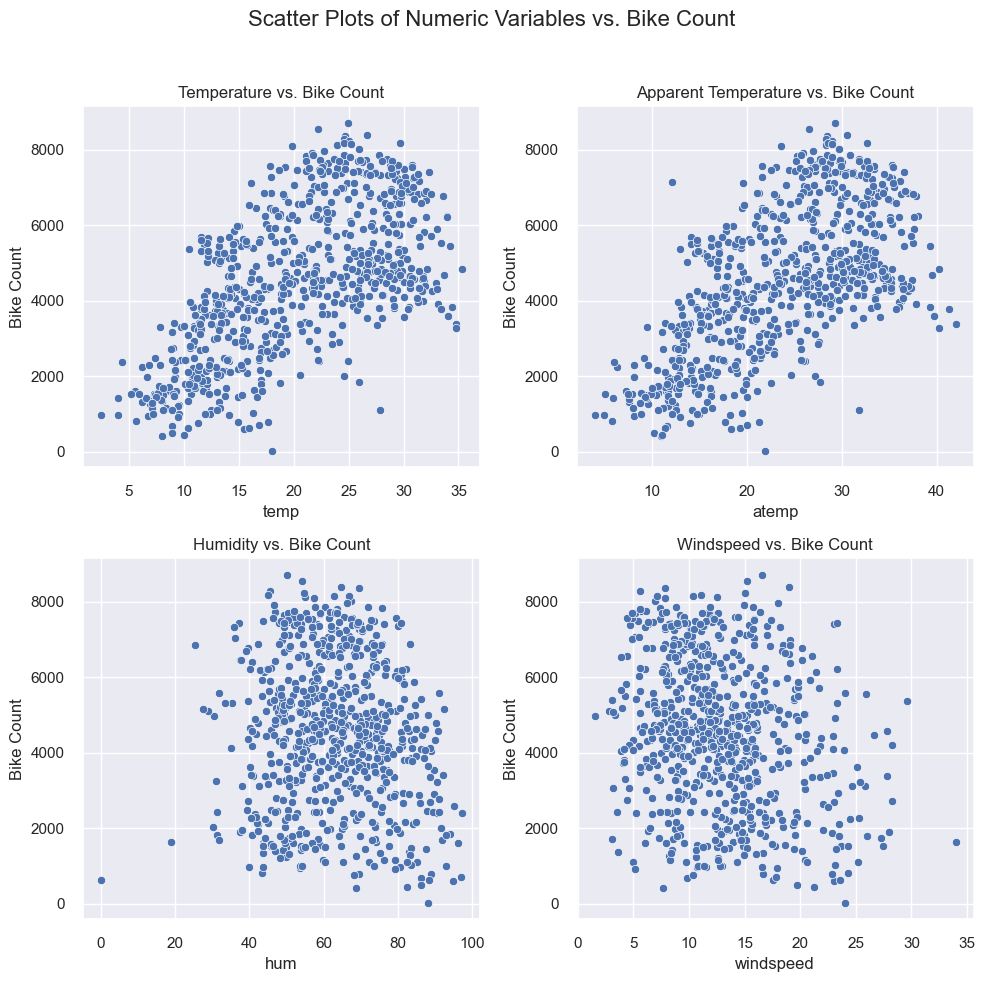

In [11]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Define variables and titles for the subplots
variables = ['temp', 'atemp', 'hum', 'windspeed']
titles = [
    'Temperature vs. Bike Count',
    'Apparent Temperature vs. Bike Count',
    'Humidity vs. Bike Count',
    'Windspeed vs. Bike Count'
]

# Create scatter plots
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=var, y='cnt', data=bike_modified)
    plt.title(titles[i])
    plt.xlabel(var)
    plt.ylabel('Bike Count')

# Overall figure title
plt.suptitle('Scatter Plots of Numeric Variables vs. Bike Count', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()

### Insights from the Scatter Plots:

    - Temperature and apparent temperature: Strong positive correlation with bike count.
    - Humidity: Weak negative correlation.
    - Windspeed: Complex relationship, possibly positive at lower speeds and less clear at higher speeds.

- Additional Considerations:
- Other factors like day, time, season, and events also influence bike rentals.
    - Correlation does not imply causation.
    - Potential Future Analysis:

 - Include more variables and explore nonlinear relationships.
    - Cluster data to identify patterns.
    - Build a predictive model for bike rentals.

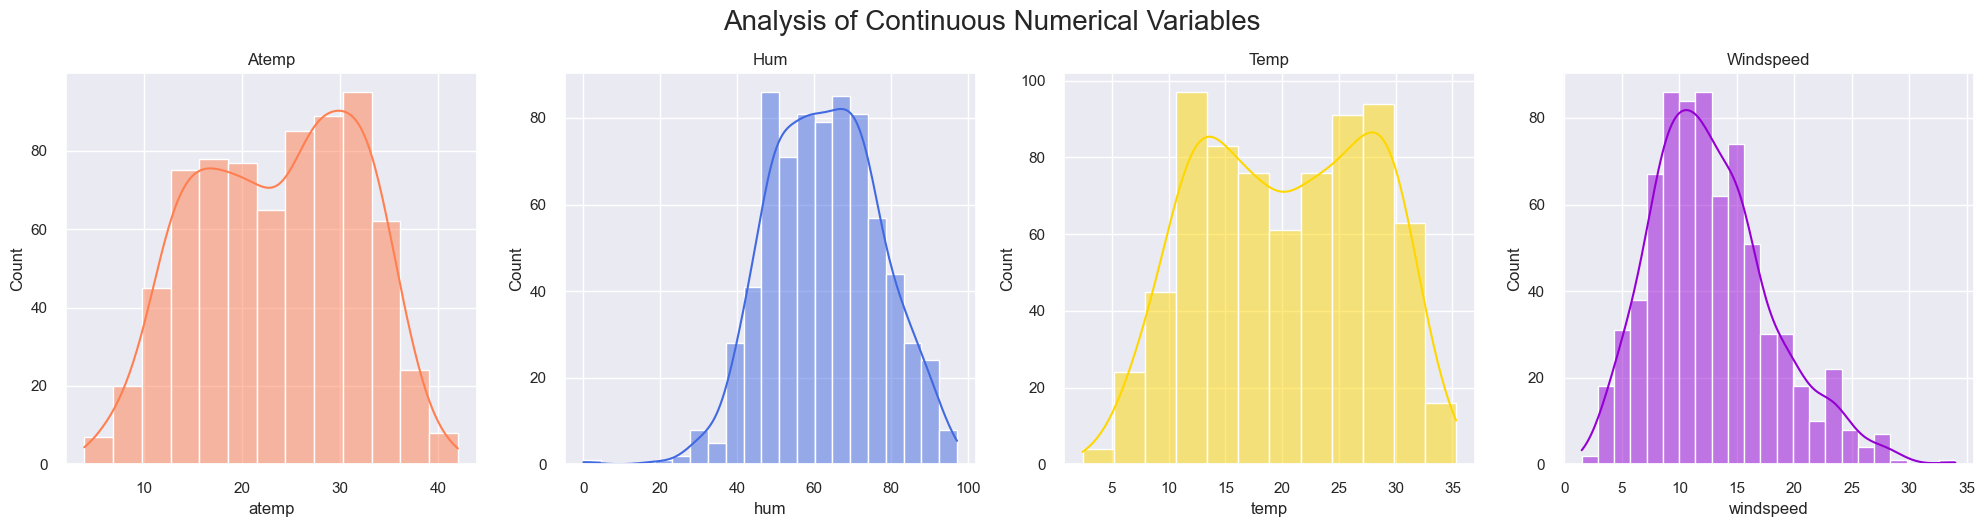

In [12]:
# Define colors for continuous variables
continuous_config = {
    'atemp': 'coral',        
    'hum': 'royalblue',      
    'temp': 'gold',          
    'windspeed': 'darkviolet'
}

# Create subplots for continuous variables
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Generate histograms with KDE for each variable
for i, (cont, color) in enumerate(continuous_config.items()):
    sns.histplot(data=bike_modified, x=cont, ax=ax[i], color=color, kde=True)
    ax[i].set_title(cont.capitalize())  # Set title for each subplot

# Adjust layout
plt.tight_layout()
plt.suptitle('Analysis of Continuous Numerical Variables', fontsize=20, y=1.05)
plt.show()

<Figure size 1000x600 with 0 Axes>

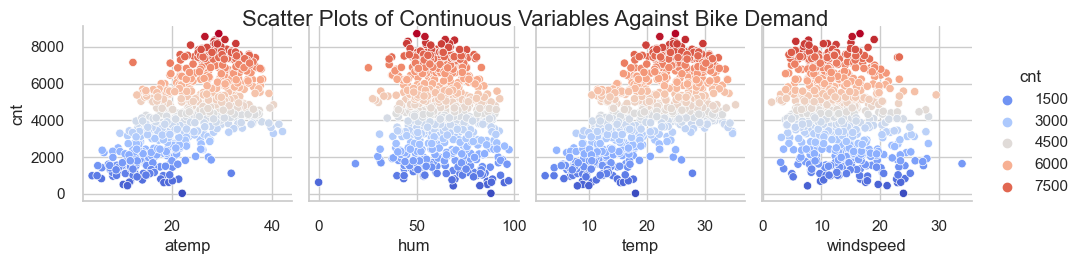

In [13]:
# Set the Seaborn style
sns.set(style='whitegrid')

# Draw pairplot for continuous independent variables against the dependent variable 'cnt'
plt.figure(figsize=(10, 6))
sns.pairplot(
    data=bike_modified,
    x_vars=list(continuous_config.keys()),
    y_vars=['cnt'],
    hue='cnt',
    palette='coolwarm'  # Changed color palette
)

# Show the plot
plt.suptitle('Scatter Plots of Continuous Variables Against Bike Demand', fontsize=16, y=1.02)
plt.show()

#### Visualizing Categorical Variables
To explore the relationship between categorical variables and the target variable, we will create boxplots for each categorical variable in relation to the target variable.

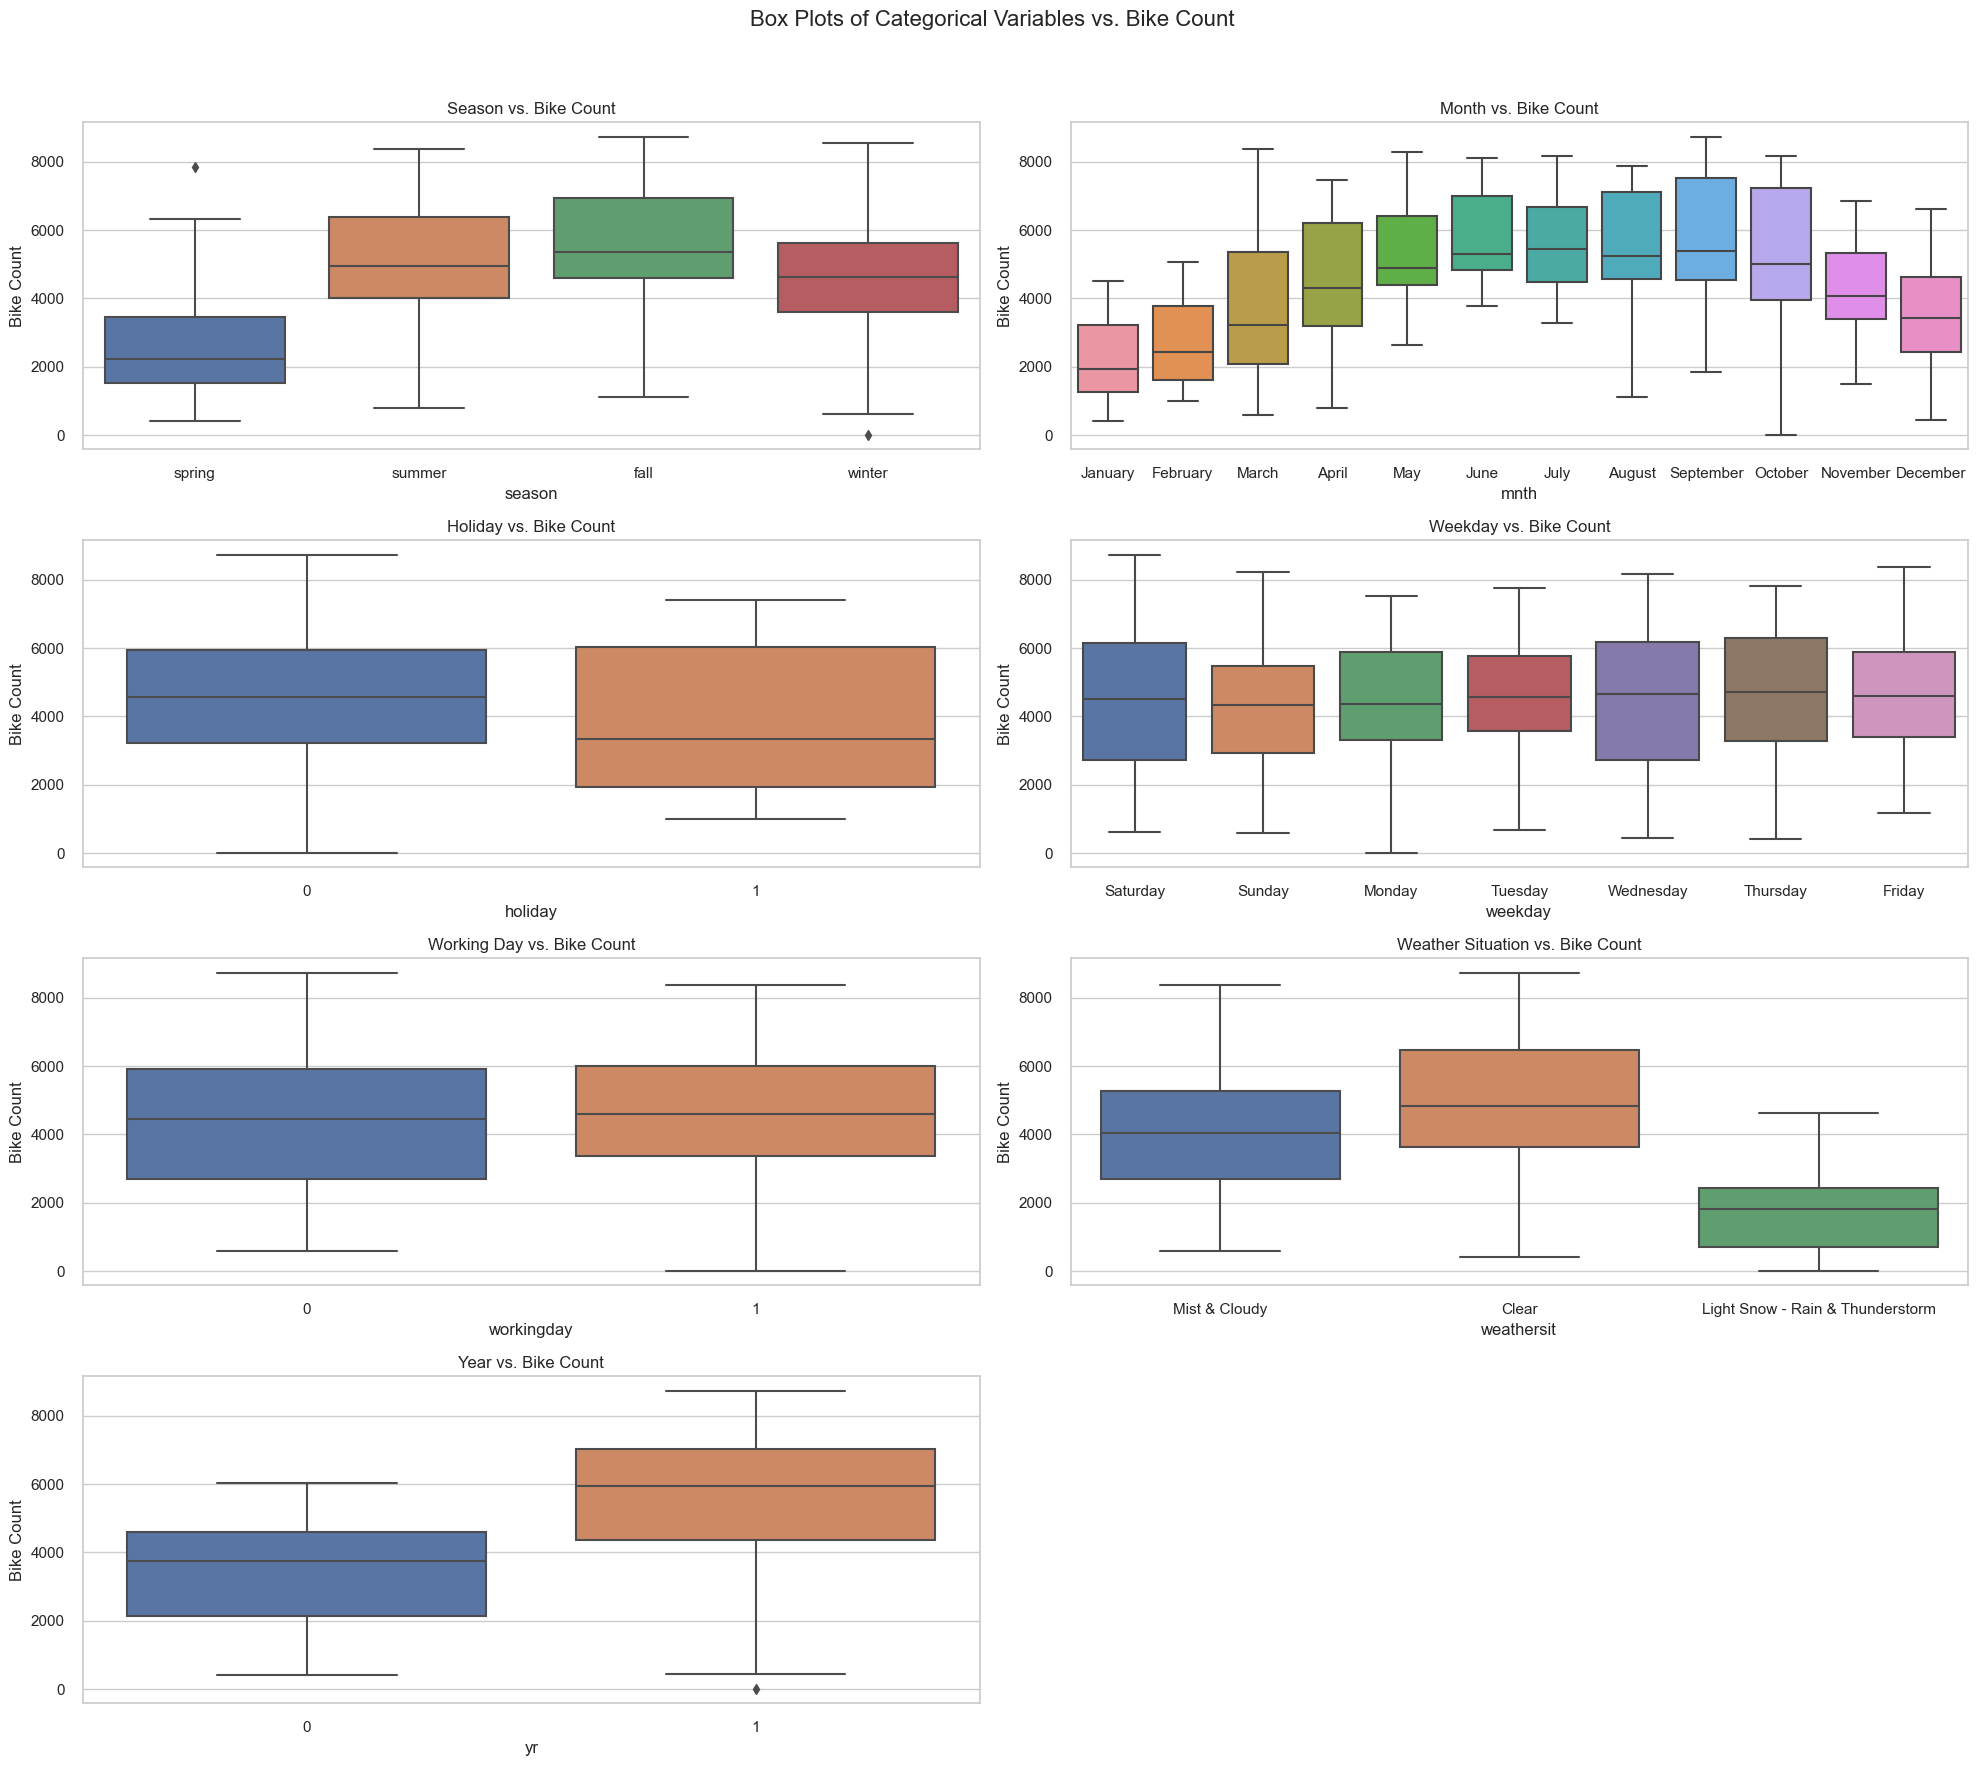

In [14]:
plt.figure(figsize=(20, 18))

# Define variables and titles for the subplots
variables = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr']
titles = [
    'Season vs. Bike Count',
    'Month vs. Bike Count',
    'Holiday vs. Bike Count',
    'Weekday vs. Bike Count',
    'Working Day vs. Bike Count',
    'Weather Situation vs. Bike Count',
    'Year vs. Bike Count'
]

# Create box plots
for i, var in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=var, y='cnt', data=bike_modified)
    plt.title(titles[i])
    plt.xlabel(var)
    plt.ylabel('Bike Count')

# Overall figure title
plt.suptitle('Box Plots of Categorical Variables vs. Bike Count', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout
plt.show()

Insights on Target Variable vs. Categorical Variables
- Seasonal Trends: Bike rentals significantly decline in spring, with peaks in the fall and summer (June to September).
- Monthly Patterns: An upward rental trend is observed from January to September, with notable dips in November and December.
- Holiday Impact: Rentals are higher on non-holiday days, with minimal daily variation.
- Weather Effects: Clear weather conditions lead to increased rentals, while heavy rain and thunderstorms deter them.
- Yearly Comparison: Rentals in 2019 exceeded those in 2018.

#### Visualizing Correlation Among Variables

Assessing the correlation among variables to identify potential multicollinearity.

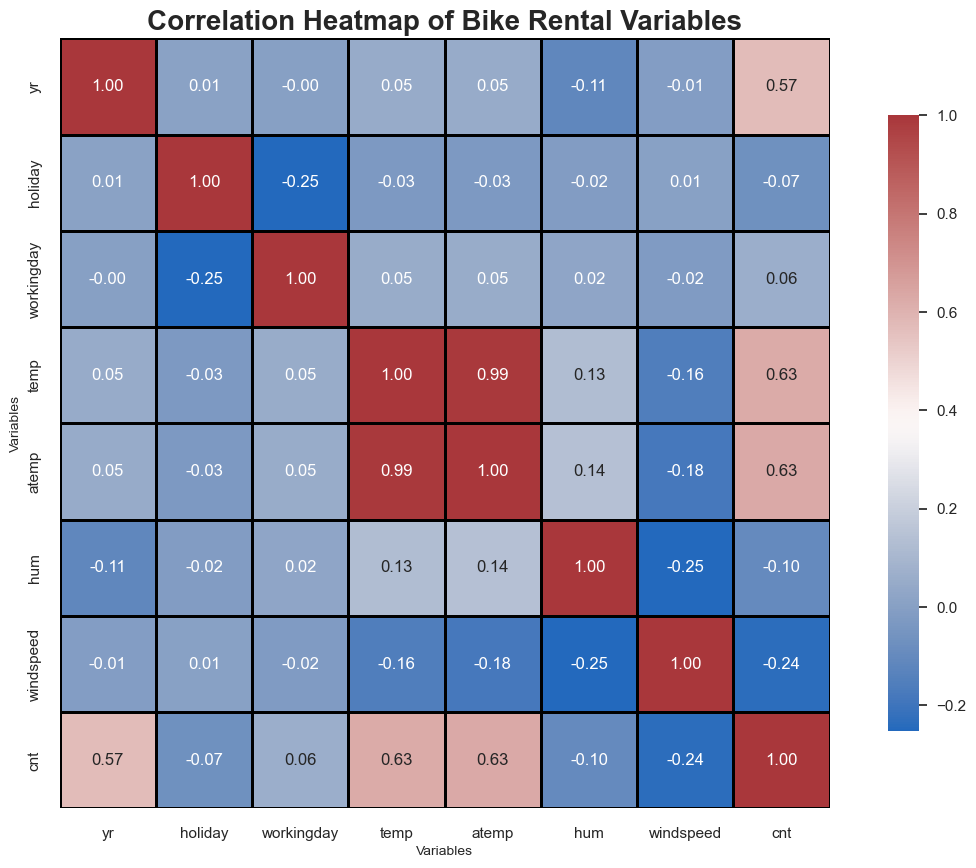

In [15]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap with customizations
sns.heatmap(
    bike_modified.corr(),                   # Correlation matrix
    cmap="vlag",                # Color map
    annot=True,                   # Show correlation values
    fmt='.2f',                    # Format for annotation
    linewidths=2,                 # Width of lines between cells
    linecolor='black',            # Color of the lines
    cbar_kws={'shrink': 0.8},    # Shrink color bar
    square=True                   # Make cells square-shaped
)

# Set the title and labels
plt.title('Correlation Heatmap of Bike Rental Variables', fontsize=20, fontweight='bold')
plt.xlabel('Variables', fontsize=10)
plt.ylabel('Variables', fontsize=10)

# Show the heatmap
plt.show()

### Insights on Correlation:

- Positive:

    - Temperature and apparent temperature strongly correlate with bike rentals.
    - There's a slight upward trend in bike rentals over the years.

- Negative:

    - High humidity might slightly discourage bike rentals.

- Other:

    - Temperature and apparent temperature are highly correlated, suggesting redundancy.

- Overall:

    - Temperature is a key driver of bike rentals.
    - Further analysis can explore non-linear relationships and other factors.

<Figure size 1200x1000 with 0 Axes>

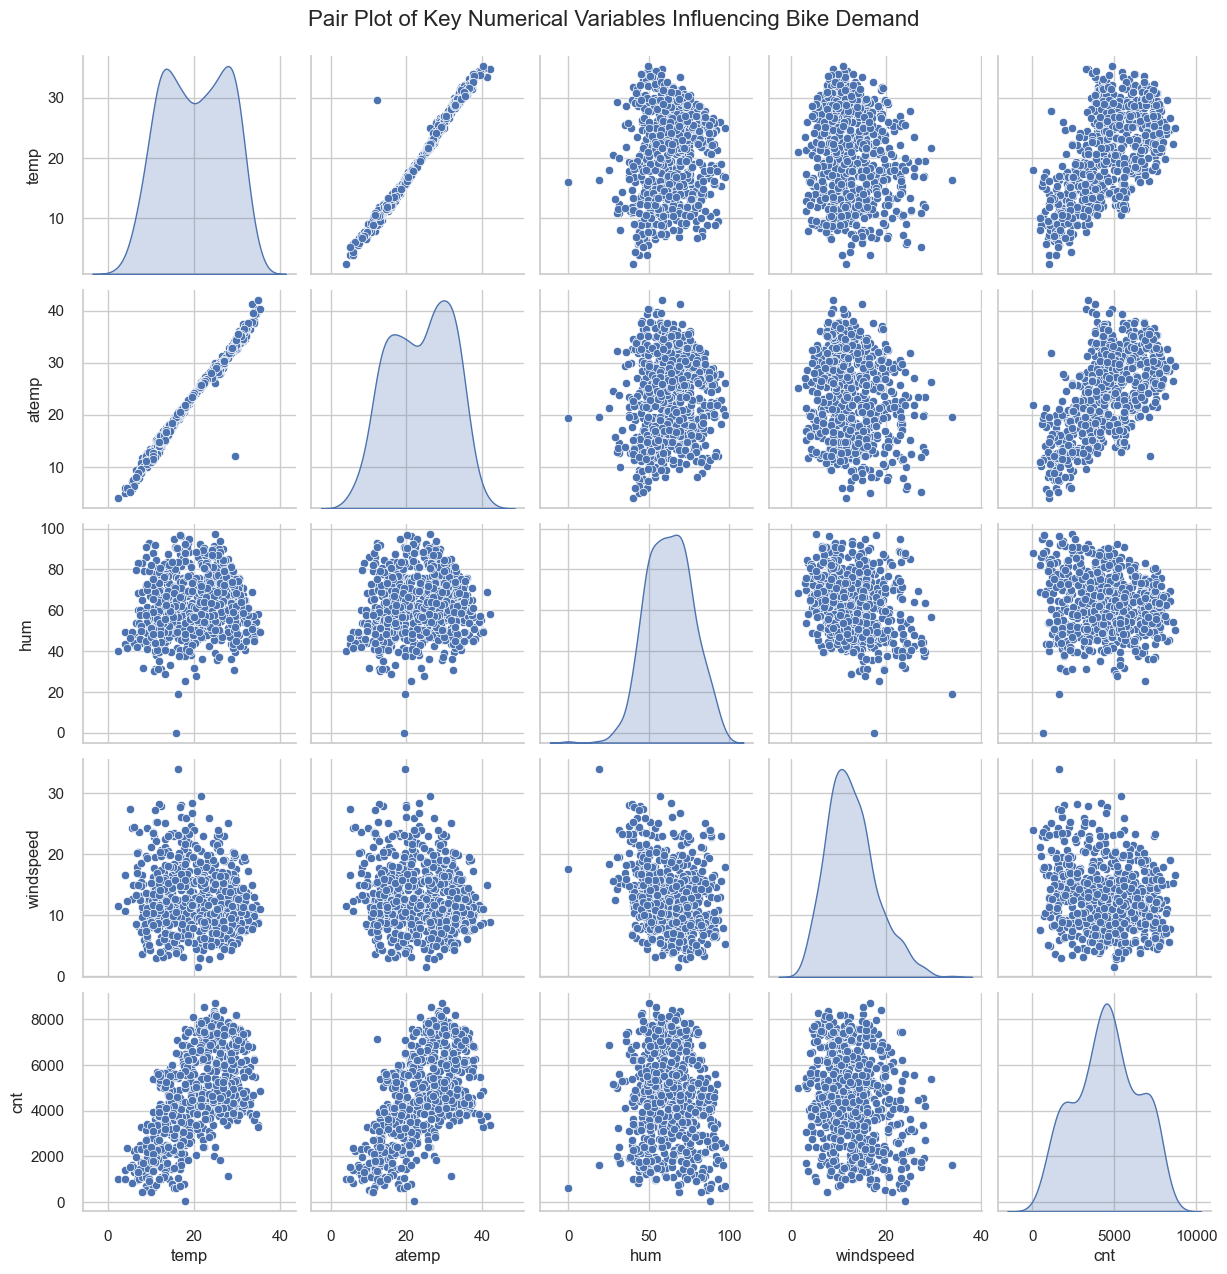

In [16]:
# Exploratory Pair Plots for Analyzing Key Numerical Variables
# Set Seaborn style
sns.set(style='whitegrid')

# Create pairplot for key numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(
    bike_modified,
    vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'],
    diag_kind='kde',      # Use kernel density estimation for diagonal
    palette='magma'     # Color palette
)

# Add title
plt.suptitle('Pair Plot of Key Numerical Variables Influencing Bike Demand', fontsize=16, y=1.02)

# Show plot
plt.show()

#### Visualizing Bike Rental Distribution with Season and Weather Situation
This visualization will illustrate the distribution of bike rentals based on seasonal changes and varying weather conditions.

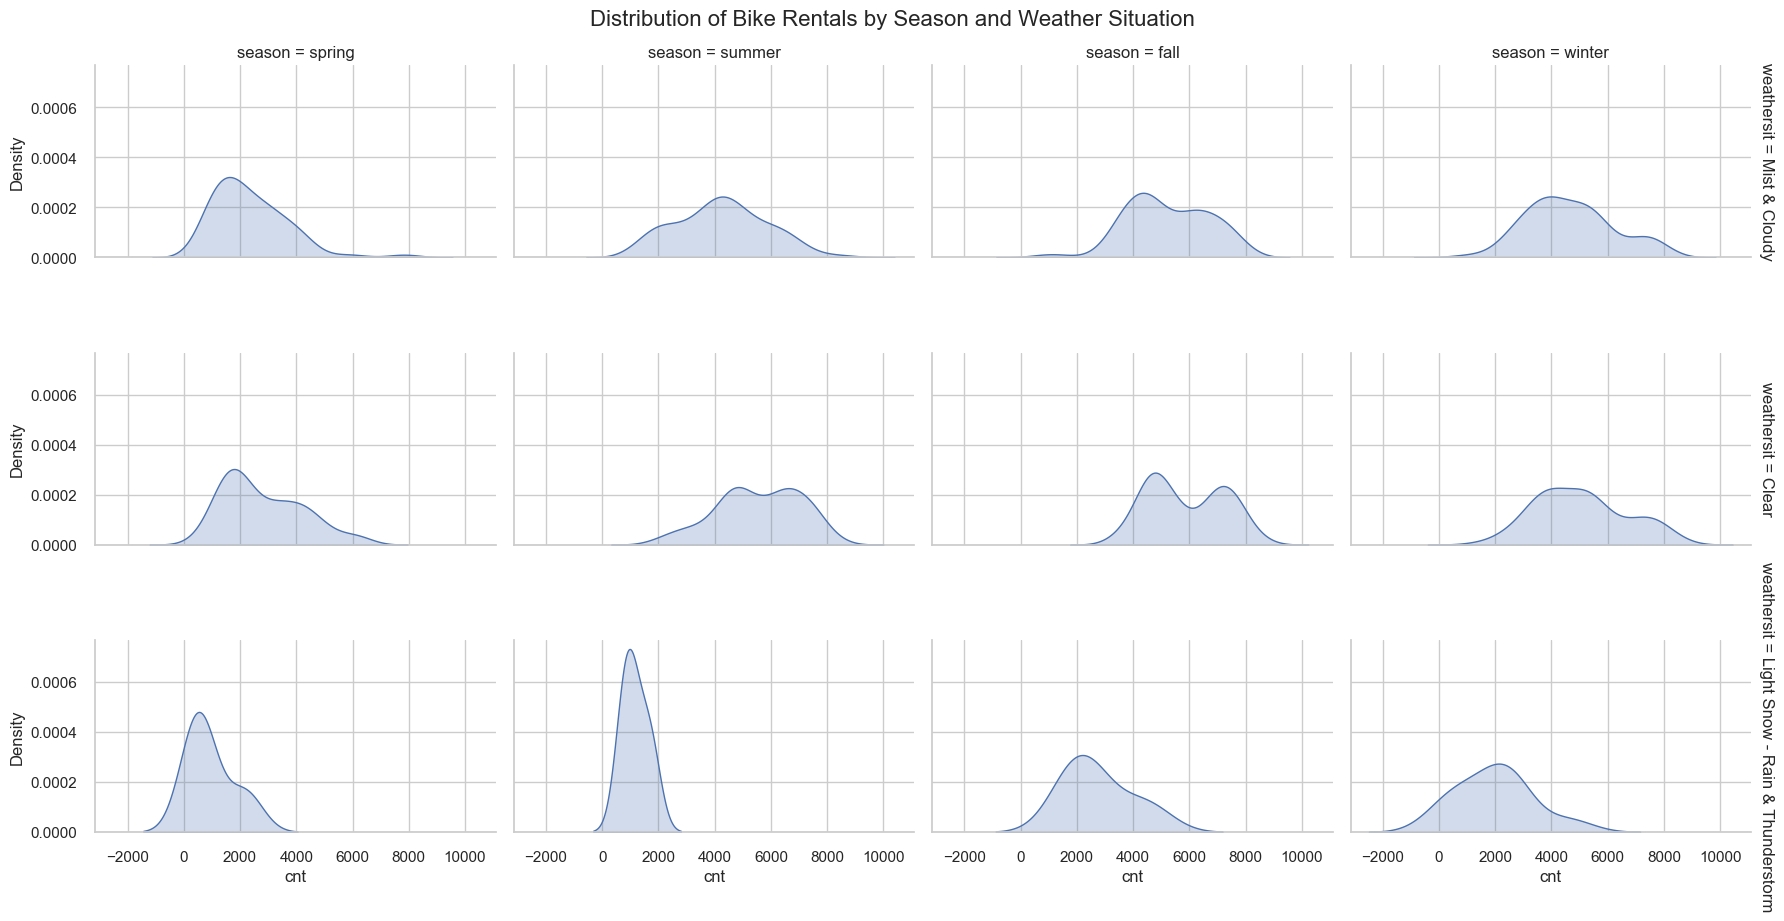

In [17]:
g = sns.FacetGrid(bike_modified, col='season', row='weathersit', margin_titles=True, height=3, aspect=1.5)
g.map(sns.kdeplot, 'cnt', fill=True)

# Customize the overall title
g.fig.suptitle('Distribution of Bike Rentals by Season and Weather Situation', fontsize=16, y=1.02)

# Show the plot
plt.show()

Insights from the Distribution Plots:

- Spring: Bike rentals are highest during clear weather, with a slight dip during mist and cloudy conditions.
- Summer: Bike rentals are highest during clear weather, with a decrease during mist and cloudy conditions.
- Winter: Bike rentals are highest during clear weather, with a significant drop during light snow, rain, and thunderstorms.
- Overall: Clear weather conditions significantly boost bike rentals across all seasons.

<Figure size 2000x1500 with 0 Axes>

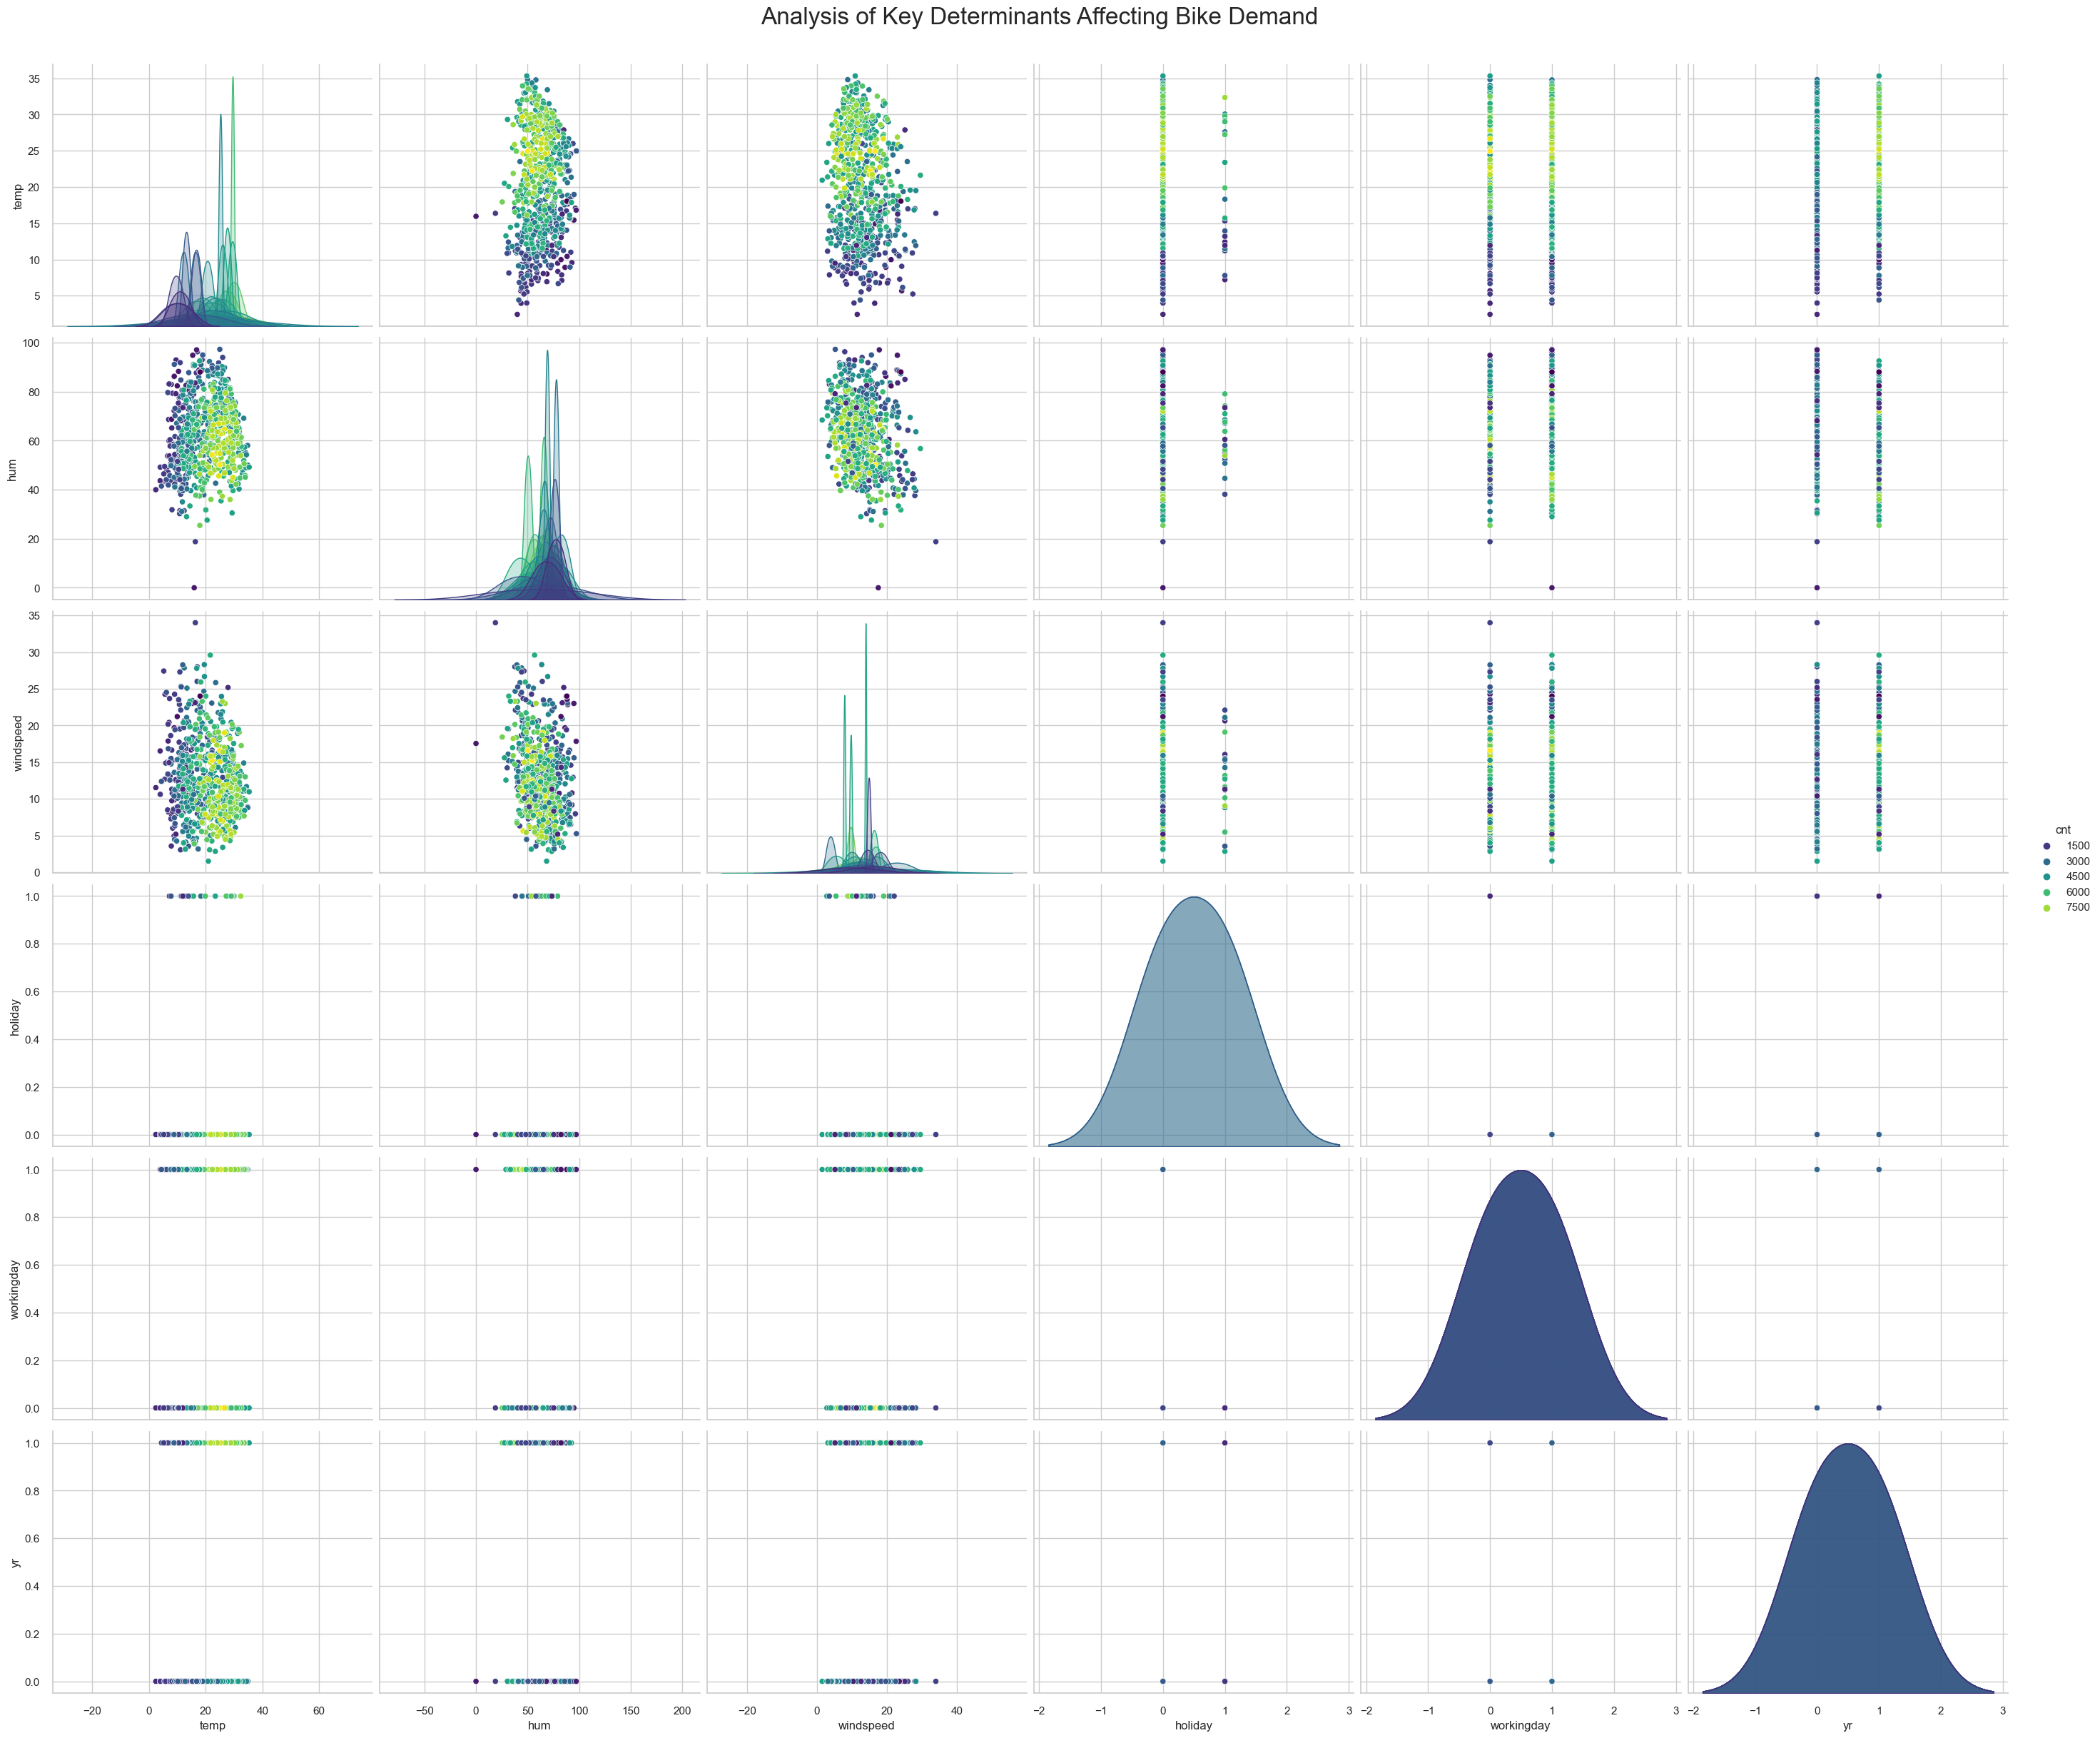

In [18]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create pairplot
plt.figure(figsize=(20, 15))
sns.pairplot(
    data=bike_modified,
    vars=['temp', 'hum', 'windspeed', 'holiday', 'workingday', 'yr'],
    hue='cnt',
    palette='viridis',
    diag_kind='kde',
    height=4,
    aspect=1.2
)

# Add title
plt.suptitle('Analysis of Key Determinants Affecting Bike Demand', fontsize=24, y=1.02)

# Show plot
plt.show()

# Key Insights from the Pair Plot

- **Temperature and Apparent Temperature**:  
  Both show a weak positive correlation with bike demand, suggesting that warmer weather leads to increased bike usage.

- **Humidity**:  
  A negative correlation is observed, indicating that higher humidity might deter people from cycling.

- **Wind Speed**:  
  The relationship is less clear, with no strong pattern visible.

## Further Considerations

- **Other Factors**:  
  The influence of factors like season, weather conditions, and day of the week should be explored further.

- **Statistical Analysis**:  
  Correlation coefficients and hypothesis testing can quantify the strength and significance of these relationships.

Overall, the plot provides a preliminary understanding of how various factors impact bike demand. Deeper analysis is needed to draw definitive conclusions.


## Step 5: Data Preparation - Dummy Variables

<div class="alert alert-block alert-info">
    <b>Dummy Variable Creation - </b> To facilitate analysis, categorical variables such as <b>season</b>, <b>mnth</b>, <b>holiday</b>, <b>weekday</b>, <b>workingday</b>, and <b>weathersit</b> will be converted into dummy variables, transforming their multiple levels into binary (0/1) indicators.
</div>

In [19]:
# Revisiting the Modified Dataset
bike_modified.head()

season  yr     mnth  holiday    weekday  workingday     weathersit  \
0  spring   0  January        0   Saturday           0  Mist & Cloudy   
1  spring   0  January        0     Sunday           0  Mist & Cloudy   
2  spring   0  January        0     Monday           1          Clear   
3  spring   0  January        0    Tuesday           1          Clear   
4  spring   0  January        0  Wednesday           1          Clear   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [20]:
# Step 1: Create dummy variables for each categorical column and drop the first level
season_dummy = pd.get_dummies(bike_modified['season'], drop_first=True)
mnth_dummy = pd.get_dummies(bike_modified['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(bike_modified['weekday'], drop_first=True)
weathersit_dummy = pd.get_dummies(bike_modified['weathersit'], drop_first=True)

# Step 2: Add these dummy variables to the original dataset
bike_modified = pd.concat([bike_modified, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis=1)

# Step 3: Drop the original categorical columns
bike_modified.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

# Check the modified dataset
bike_modified.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  winter  August  December  February  January  July  June  \
0       1       0       0       0         0         0        1     0     0   
1       1       0       0       0         0         0        1     0     0   
2       1       0       0       0         0         0        1     0     0   
3       1       0       0       0         0         0        1     0     0   
4       1       0       0       0         0         0        1     0     0   

   March  May  November  October  September  Monday  Saturday  Sunday  \
0      0    0         0        0          0       0         1       0   
1      0    0         0        0          0       0         0       1   
2      0    0         0        0          0       1         0       0   
3      0    0         0        0          0       0         0       0   
4      0    0         0        0          0       0         0       0   

   Thursday  Tuesday  Wednesday  Light Snow - Rain & Thunderstorm  \
0         0        0          0                                 0   
1         0        0          0                                 0   
2         0        0          0                                 0   
3         0        1          0                                 0   
4         0        0          1                                 0   

   Mist & Cloudy  
0              1  
1              1  
2              0  
3              0  
4              0

In [21]:
# Inspecting the columns in dataframe
bike_modified.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow - Rain & Thunderstorm', 'Mist & Cloudy'],
      dtype='object')

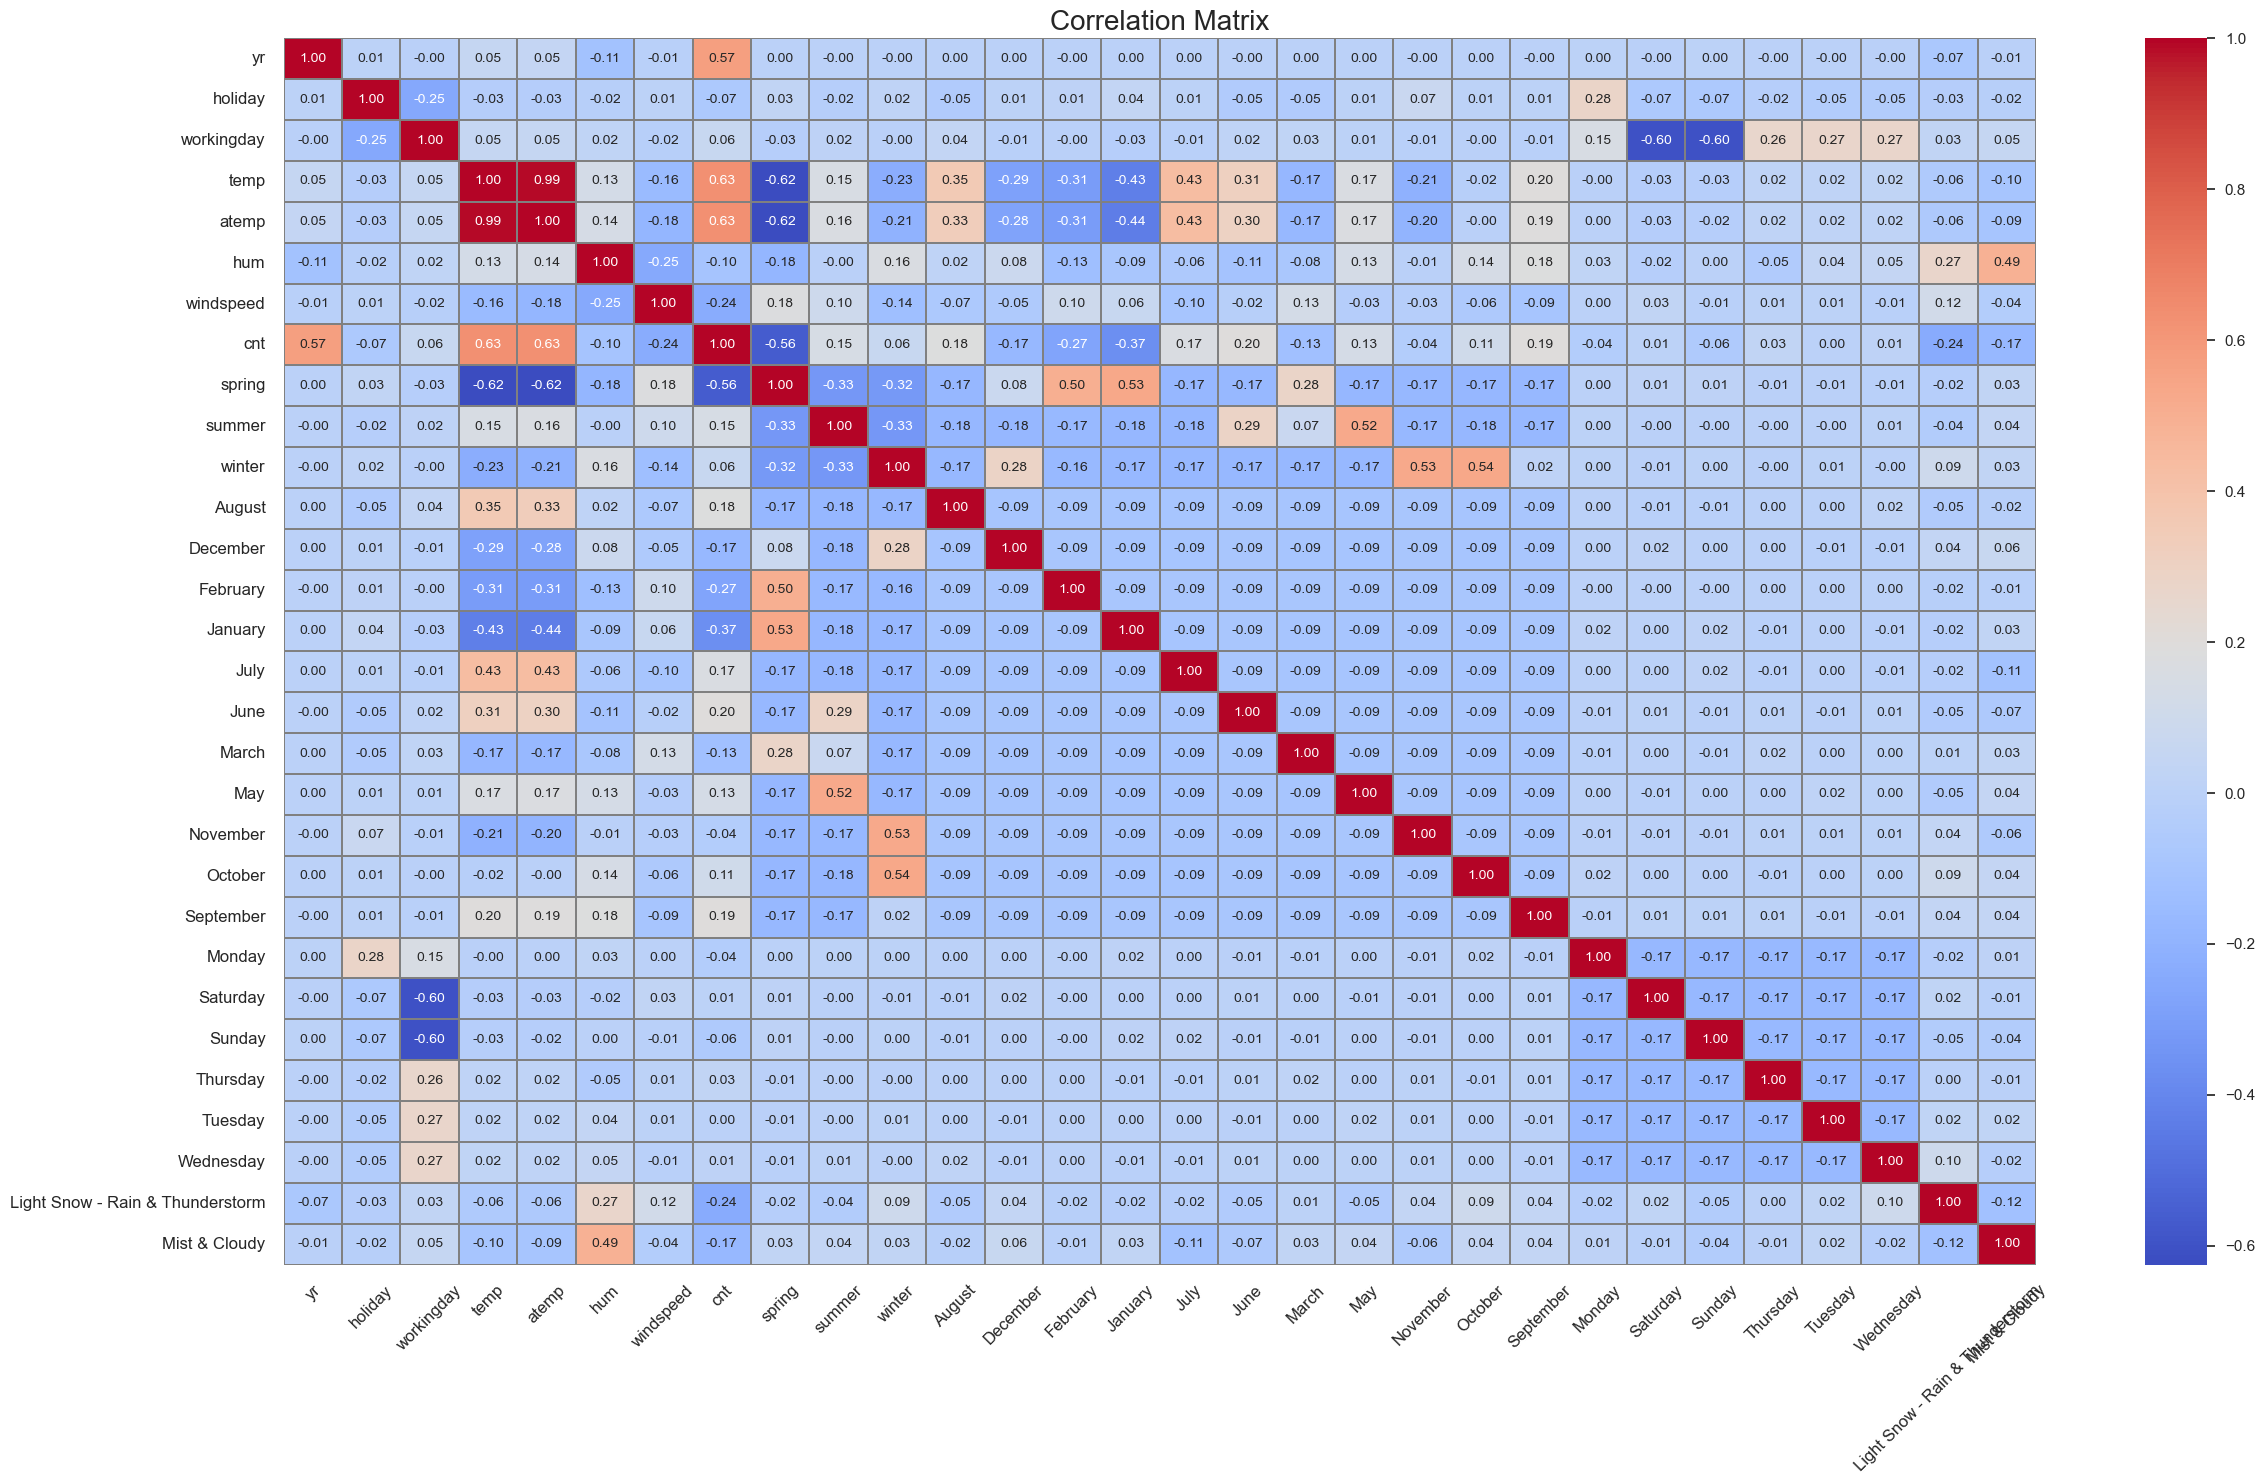

In [22]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize=(25, 15))
cor_df = bike_modified.corr(numeric_only=True)

sns.heatmap(
    data=cor_df, annot=True, fmt=".2f", cmap="coolwarm",
    annot_kws={"size": 10}, linewidths=0.3, linecolor="gray"
)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### The modified bike dataframe for modeling contains 730 rows and 16 columns.

In [23]:
# Shape of the data frame before processing.
bike_modified_shape = bike_data.shape
print("Total number of Coloums:", bike_modified_shape[1])
print("Total number of Rows:", bike_modified_shape[0])

Total number of Coloums: 16
Total number of Rows: 730


## Step 6: Model Building and Evaluation

### Data Partitioning

<div class="alert alert-block alert-info">
    <b>Dataset Splitting - </b> The dataset will be divided into two subsets:
    <ul>
        <li><b>Training Set:</b> Approximately 70% of the data, used to develop and train the model.</li>
        <li><b>Testing Set:</b> Approximately 30% of the data, reserved for evaluating model performance.</li>
    </ul>
</div>


In [24]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = bike_modified.drop('cnt', axis = 1)
Y = bike_modified['cnt']

### Partitioning the Dataset into Training and Testing Sets

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 150)

In [26]:
# Verifying the dimensions of the training and testing sets
print("Training feature set shape:", X_train.shape)
print("Training target set shape:", Y_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Testing target set shape:", Y_test.shape)

Training feature set shape: (511, 29)
Training target set shape: (511,)
Testing feature set shape: (219, 29)
Testing target set shape: (219,)


In [27]:
# Displaying the first few rows of the training feature set
X_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  spring  \
726   1        0           1  10.386653  12.75230  59.0000  10.416557       1   
589   1        0           1  29.554153  33.11270  54.5417   9.126204       0   
60    0        0           1  13.735000  16.00355  44.9583  20.624811       1   
261   0        0           1  22.515847  26.48375  69.0000  10.166714       0   
608   1        0           0  30.886653  35.13270  63.8333   7.583529       0   

     summer  winter  August  December  February  January  July  June  March  \
726       0       0       0         1         0        0     0     0      0   
589       0       0       1         0         0        0     0     0      0   
60        0       0       0         0         0        0     0     0      1   
261       0       0       0         0         0        0     0     0      0   
608       0       0       0         0         0        0     0     0      0   

     May  November  October  September  Monday  Saturday  Sunday  Thursday  \
726    0         0        0          0       0         0       0         0   
589    0         0        0          0       1         0       0         0   
60     0         0        0          0       0         0       0         0   
261    0         0        0          1       1         0       0         0   
608    0         0        0          1       0         1       0         0   

     Tuesday  Wednesday  Light Snow - Rain & Thunderstorm  Mist & Cloudy  
726        0          0                                 0              1  
589        0          0                                 0              0  
60         0          1                                 0              0  
261        0          0                                 0              1  
608        0          0                                 0              1

### Feature Scaling with StandardScaler

The `StandardScaler` is a preprocessing technique that standardizes features by removing the mean and scaling to unit variance. This transformation results in each feature having a mean of 0 and a standard deviation of 1, ensuring consistency in scale for algorithms sensitive to feature magnitudes.


In [28]:
# Scaling feature values using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform the data
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

# Transform the test set using the fitted scaler
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [29]:
# Displaying the first few rows of the scaled training feature set
X_train_scaled.head()

yr   holiday  workingday      temp     atemp       hum  windspeed  \
726  1.013794 -0.185507    0.669023 -1.310737 -1.331642 -0.251011  -0.418771   
589  1.013794 -0.185507    0.669023  1.201990  1.127309 -0.570953  -0.669005   
60  -0.986394 -0.185507    0.669023 -0.871792 -0.938984 -1.258689   1.560884   
261 -0.986394 -0.185507    0.669023  0.279317  0.326723  0.466621  -0.467222   
608  1.013794 -0.185507   -1.494716  1.376671  1.371267  0.095842  -0.968171   

       spring    summer    winter    August  December  February   January  \
726  1.694465 -0.578103 -0.563037 -0.303118  3.632416  -0.30695 -0.329332   
589 -0.590157 -0.578103 -0.563037  3.299048 -0.275299  -0.30695 -0.329332   
60   1.694465 -0.578103 -0.563037 -0.303118 -0.275299  -0.30695 -0.329332   
261 -0.590157 -0.578103 -0.563037 -0.303118 -0.275299  -0.30695 -0.329332   
608 -0.590157 -0.578103 -0.563037 -0.303118 -0.275299  -0.30695 -0.329332   

         July      June     March       May  November   October  September  \
726 -0.310752 -0.299253 -0.275299 -0.318266 -0.303118 -0.314523  -0.291420   
589 -0.310752 -0.299253 -0.275299 -0.318266 -0.303118 -0.314523  -0.291420   
60  -0.310752 -0.299253  3.632416 -0.318266 -0.303118 -0.314523  -0.291420   
261 -0.310752 -0.299253 -0.275299 -0.318266 -0.303118 -0.314523   3.431472   
608 -0.310752 -0.299253 -0.275299 -0.318266 -0.303118 -0.314523   3.431472   

       Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday  \
726 -0.421212 -0.408248 -0.391789  -0.39841 -0.417986  -0.430830   
589  2.374103 -0.408248 -0.391789  -0.39841 -0.417986  -0.430830   
60  -0.421212 -0.408248 -0.391789  -0.39841 -0.417986   2.321099   
261  2.374103 -0.408248 -0.391789  -0.39841 -0.417986  -0.430830   
608 -0.421212  2.449490 -0.391789  -0.39841 -0.417986  -0.430830   

     Light Snow - Rain & Thunderstorm  Mist & Cloudy  
726                         -0.155074       1.356056  
589                         -0.155074      -0.737432  
60                          -0.155074      -0.737432  
261                         -0.155074       1.356056  
608                         -0.155074       1.356056

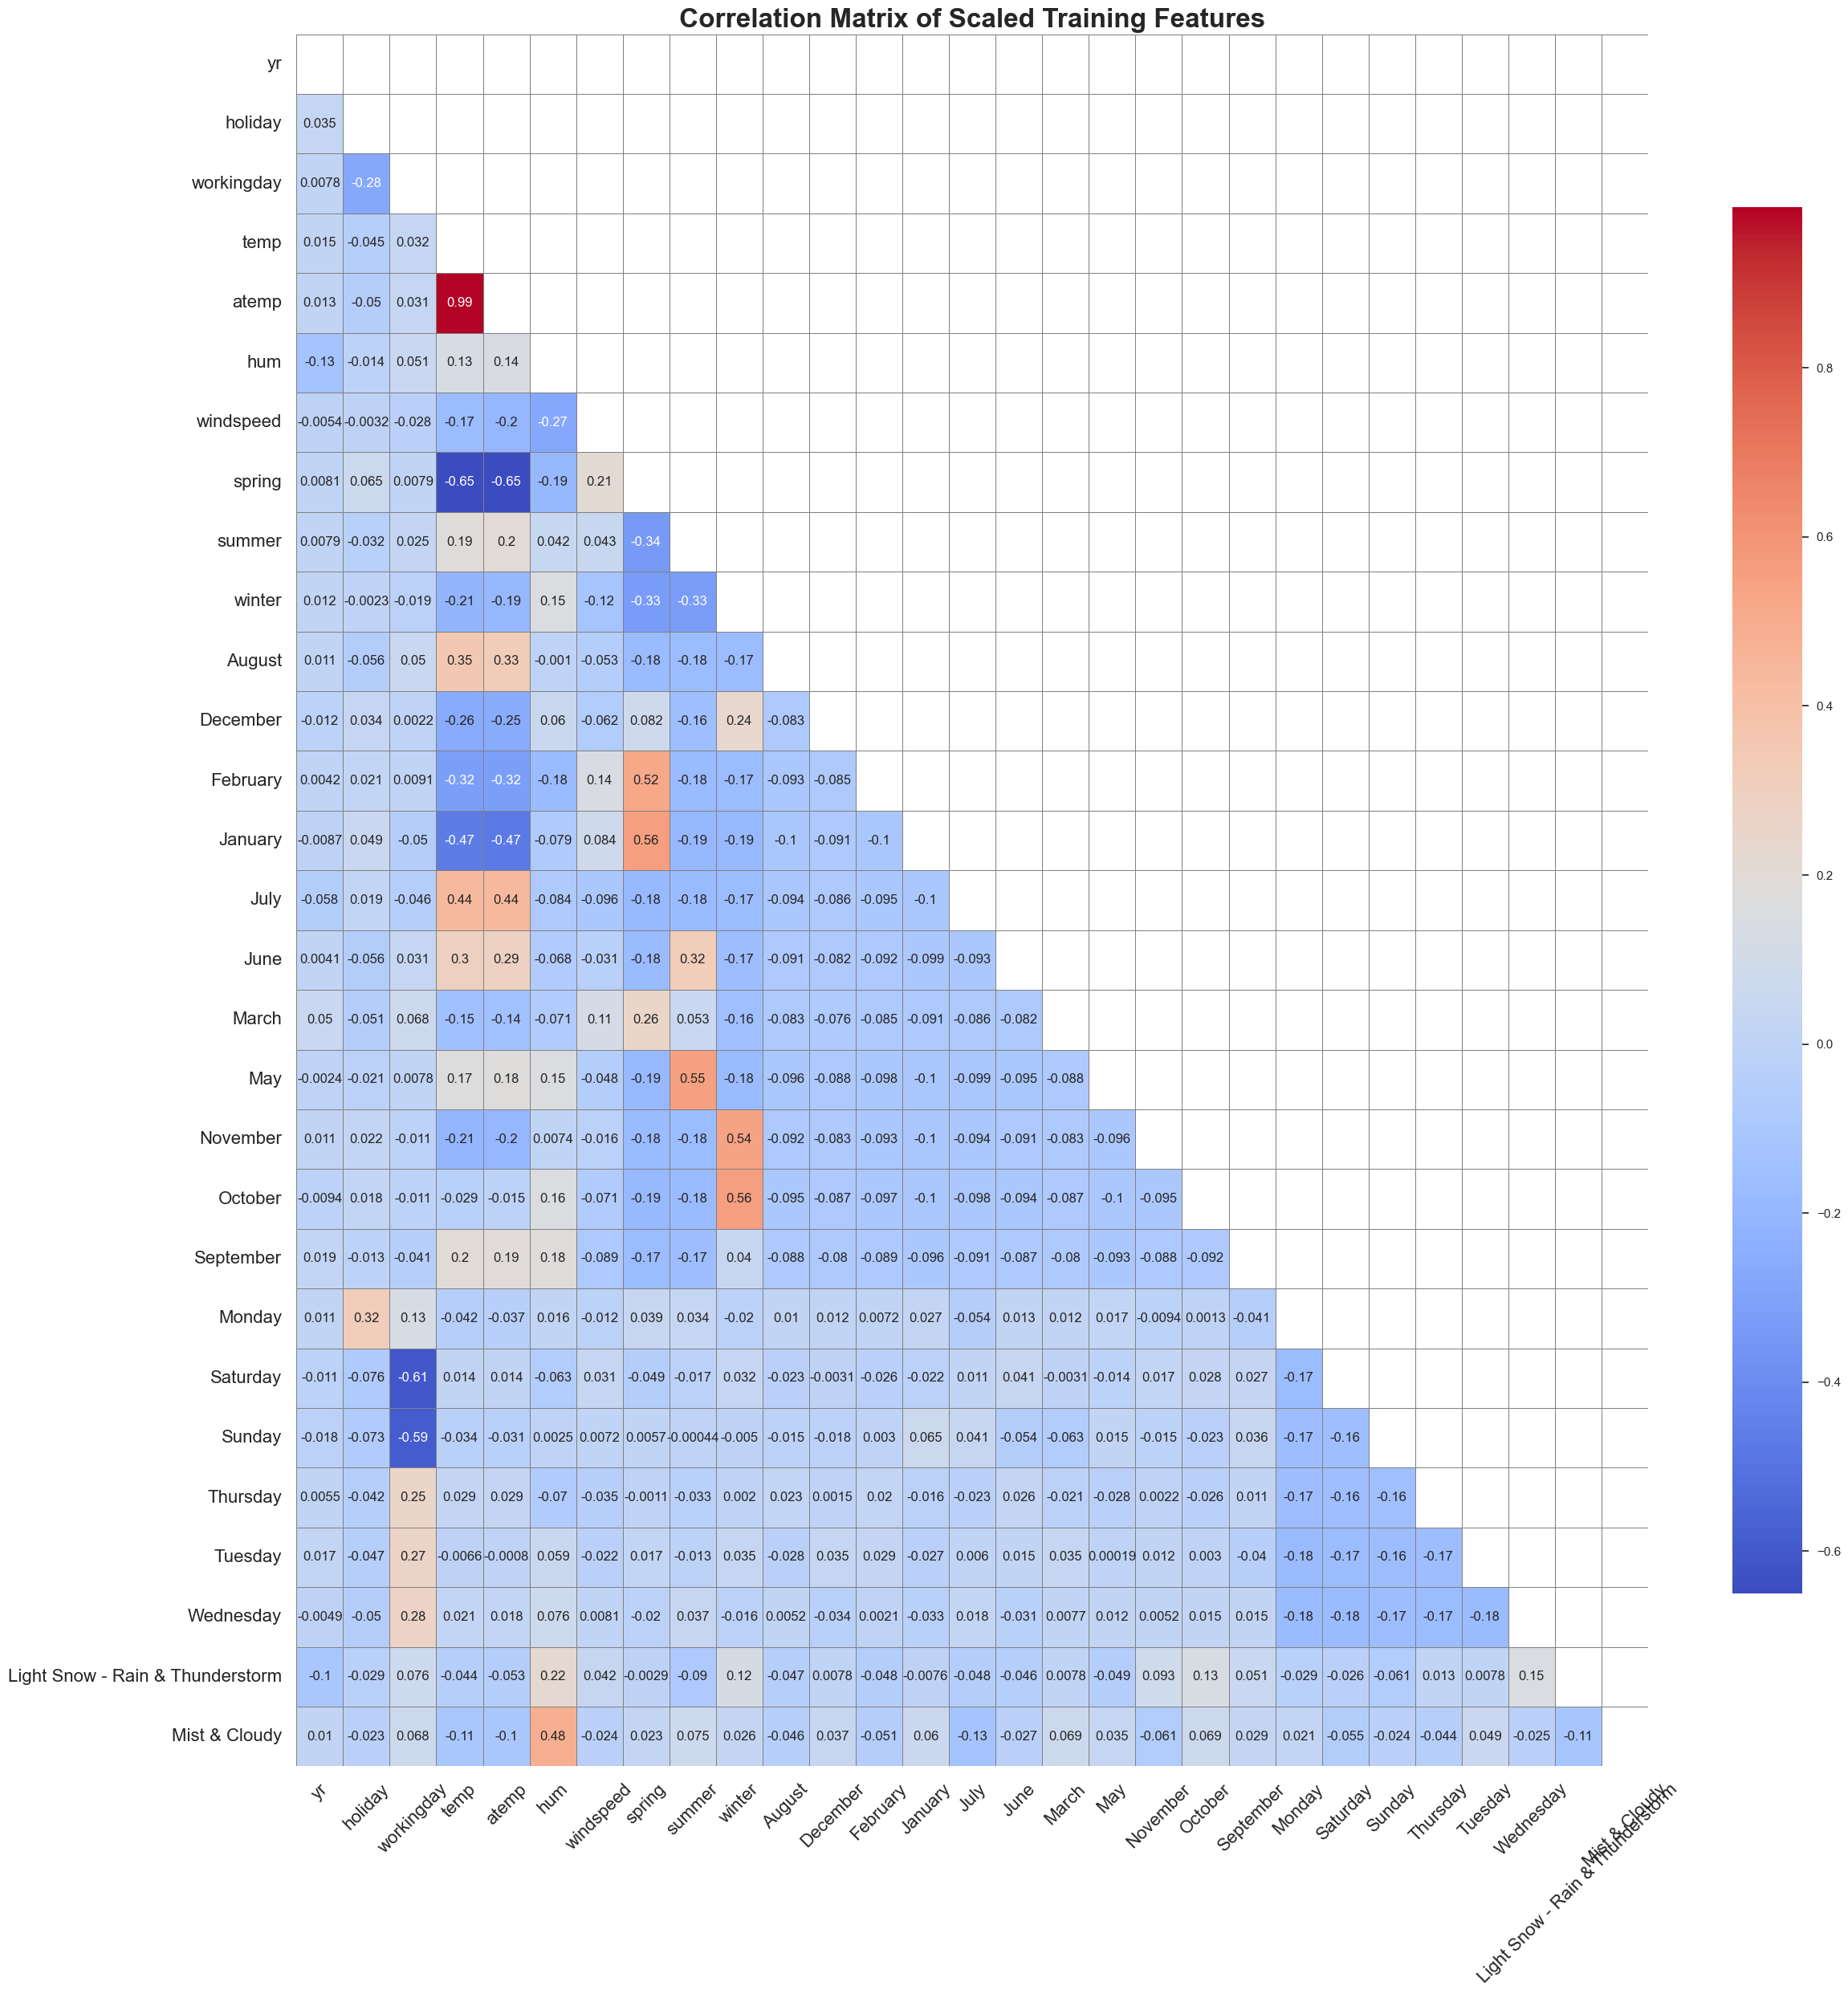

In [30]:
# Visualizing the correlation matrix of the scaled training feature set
plt.figure(figsize=(25, 25))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(X_train_scaled.corr(), dtype=bool))

# Generate a heatmap to display correlations
sns.heatmap(
    X_train_scaled.corr(),
    annot=True,
    cmap="coolwarm",
    mask=mask,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

# Set title and adjust layout
plt.title("Correlation Matrix of Scaled Training Features", fontsize=24, fontweight='bold')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- ***`November` and `October` exhibit a strong positive correlation with the `Winter` season.***
- **`May` shows a high correlation with the `Summer` season.**
- **`hum` (humidity) is positively correlated with the `Moderate` temperature range.**

### Feature Selection with Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection method that improves model performance and efficiency by iteratively removing the least significant features. By evaluating feature importance at each step, RFE identifies the most relevant subset of features, enhancing model accuracy and reducing complexity.

**Selecting the Top 15 Features Identified by RFE**

In [31]:
# Initialize and train the model using Recursive Feature Elimination (RFE)
model = LinearRegression()

# Configure RFE to select the top 15 features
RFE = RFE(estimator=model, n_features_to_select=15)

# Fit RFE on the scaled training set
RFE.fit(X_train_scaled, Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
RFE.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [33]:
# Display feature names along with their selection status and ranking from RFE
feature_selection_status = list(zip(X_train_scaled.columns, RFE.support_, RFE.ranking_))
feature_selection_status

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('August', False, 13),
 ('December', False, 2),
 ('February', False, 4),
 ('January', False, 3),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 9),
 ('September', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 10),
 ('Wednesday', False, 11),
 ('Light Snow - Rain & Thunderstorm', True, 1),
 ('Mist & Cloudy', True, 1)]

In [34]:
# Retrieve the feature columns selected by the RFE process
selected_features = X_train_scaled.columns[RFE.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'July', 'November', 'September', 'Saturday', 'Sunday',
       'Light Snow - Rain & Thunderstorm', 'Mist & Cloudy'],
      dtype='object')

In [35]:
# Retrieve the feature columns excluded by the RFE process
rejected_features = X_train_scaled.columns[~RFE.support_]
rejected_features

Index(['atemp', 'summer', 'August', 'December', 'February', 'January', 'June',
       'March', 'May', 'October', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### General Utility Functions

The following are three reusable Python functions for model building, Variance Inflation Factor (VIF) calculation, and adjusted R² score computation.


In [36]:
def adjusted_r2_score(Y_true, Y_pred, n_features):
    """
    Calculate the Adjusted R-squared (R²_adj) score.

    The Adjusted R² score is a refinement of the traditional R-squared that accounts for the number of predictors 
    in a regression model. It penalizes the inclusion of unnecessary predictors that do not significantly enhance 
    the explanatory power of the model.

    Parameters:
    - Y_true (array-like): Actual target values.
    - Y_pred (array-like): Predicted target values.
    - n_features (int): Number of independent variables in the model.

    Returns:
    - float: Adjusted R-squared score.
    """
    # Calculate the traditional R-squared score
    r2 = r2_score(Y_true, Y_pred)
    n = len(Y_true)
    
    # Calculate the adjusted R-squared score
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

In [37]:
def calculate_VIF(X_train):
    """
    Calculate Variance Inflation Factor (VIF) for features in the training dataset.

    The VIF quantifies the degree of multicollinearity among features, indicating how much the variance of each feature 
    is inflated due to correlations with other features. High VIF values suggest significant collinearity.

    Parameters:
    - X_train (pd.DataFrame): DataFrame containing the training features.

    Returns:
    - pd.DataFrame: DataFrame with features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round VIF values to two decimal places and sort by VIF in descending order
    vif["VIF"] = vif["VIF"].round(2)
    return vif.sort_values(by="VIF", ascending=False)

In [38]:
def generate_model_with_summary(X_train, Y_train):
    """
    Fit an Ordinary Least Squares (OLS) model using statsmodels, display the model summary,
    and return a dictionary with the fitted model and the training features (including a constant term).

    Parameters:
    - X_train (pd.DataFrame): DataFrame containing the training features.
    - y_train (pd.Series): Series containing the target variable for training.

    Returns:
    - dict: Dictionary containing the fitted OLS model ('model') and the training features 
            with an added constant term ('X_train_sm').
    """
    # Add a constant term to the training features
    X_train_sm = sm.add_constant(X_train)
    
    # Fit the OLS model
    model = sm.OLS(Y_train, X_train_sm).fit()
    
    # Display model summary
    print(model.summary())
    
    return {'model': model, 'X_train_sm': X_train_sm}

<div class="alert alert-block alert-warning">
    <b>Manual Feature Elimination Using Statsmodels and VIF:</b>
    <p>When performing manual feature elimination, consider the following steps:</p>
    <br>
    <b>1. Multicollinearity</span>:</b>
    <p>Address high correlation between features to avoid redundancy.</p>
    <br>
    <b>2. Overfitting</span>:</b>
    <p>Prevent the model from fitting noise in the data, which can lead to poor generalization.</p>
    <br>
    <b>3. Interpretability</span>:</b>
    <p>Simplify the model to enhance understanding and communication of results.</p>
    <br>
    <b>4. Model Performance</span>:</b>
    <p>Improve computational efficiency and ensure robust generalization to unseen data.</p>
    <br>
    <b>5. Data Quality</span>:</b>
    <p>Eliminate irrelevant or redundant features to maintain cleaner and more effective datasets.</p>
    <br>
    <p>Manual feature elimination involves identifying features with p-values greater than 0.05, indicating that their coefficients are statistically insignificant, as well as features with Variance Inflation Factor (VIF) values exceeding 5, which suggests multicollinearity.</p>
</div>


### MODEL BUILD 1 : WITH RFE VARIABLES

In [39]:
# Subset the scaled training features based on the selected features from RFE
X_train_rfe_1 = X_train_scaled[selected_features]

# Generate and summarize the OLS model using the selected features
model_summary = generate_model_with_summary(X_train_rfe_1, Y_train)

# Calculate the Variance Inflation Factor (VIF) for the selected features
vif_results = calculate_VIF(X_train_rfe_1)

# Display the Variance Inflation Factor (VIF) results for the updated set of features
vif_results

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          6.67e-187
Time:                        03:10:17   Log-Likelihood:                -4121.6
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Features   VIF
1                            holiday   inf
2                         workingday   inf
11                          Saturday   inf
12                            Sunday   inf
3                               temp  3.44
6                             spring  2.99
7                             winter  2.09
4                                hum  1.83
14                     Mist & Cloudy  1.55
9                           November  1.50
8                               July  1.37
13  Light Snow - Rain & Thunderstorm  1.19
5                          windspeed  1.17
10                         September  1.13
0                                 yr  1.05

### Model 2

The feature **holiday** has been excluded from the model due to its elevated and a high Variance Inflation Factor (VIF) approaching infinity, which indicates potential multicollinearity issues.

In [40]:
# Remove the 'holiday' feature from the selected features
X_train_rfe_2 = X_train_rfe_1.drop(['holiday'], axis=1)

# Generate and summarize the OLS model using the updated set of features
model_summary_2 = generate_model_with_summary(X_train_rfe_2, Y_train)

# Calculate the Variance Inflation Factor (VIF) for the updated set of features
vif_results_2 = calculate_VIF(X_train_rfe_2)

# Display the Variance Inflation Factor (VIF) results for the updated set of features
vif_results_2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          6.67e-187
Time:                        03:10:17   Log-Likelihood:                -4121.6
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Features   VIF
1                         workingday  6.81
10                          Saturday  4.59
11                            Sunday  4.37
2                               temp  3.44
5                             spring  3.00
6                             winter  2.09
3                                hum  1.83
13                     Mist & Cloudy  1.55
8                           November  1.50
7                               July  1.37
12  Light Snow - Rain & Thunderstorm  1.19
4                          windspeed  1.17
9                          September  1.13
0                                 yr  1.05

### Model 3

The feature **Sunday** has been excluded from the model due to its high p-value of 0.269, indicating that it does not contribute significantly to the model's predictive power.

In [41]:
# Remove the 'Monday' feature from the updated set of features
X_train_rfe_3 = X_train_rfe_2.drop(['Sunday'], axis=1)

# Generate and summarize the OLS model using the refined set of features
final_model = generate_model_with_summary(X_train_rfe_3, Y_train)

# Calculate the Variance Inflation Factor (VIF) for the refined set of features
calculate_VIF(X_train_rfe_3)

# # Display the Variance Inflation Factor (VIF) results for the updated set of features
# final_model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.49e-188
Time:                        03:10:17   Log-Likelihood:                -4122.2
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Features   VIF
2                               temp  3.44
5                             spring  2.99
6                             winter  2.09
3                                hum  1.83
1                         workingday  1.64
10                          Saturday  1.61
12                     Mist & Cloudy  1.55
8                           November  1.50
7                               July  1.37
11  Light Snow - Rain & Thunderstorm  1.19
4                          windspeed  1.17
9                          September  1.13
0                                 yr  1.05

The model is considered satisfactory due to the exceptionally low Prob (F-statistic) of <span style="background-color:lightblue;">**8.49e-188**</span>, along with features exhibiting low p-values and VIF values. The model's \( R^2 \) and Adjusted \( R^2 \) values are <span style="background-color:lightgreen;">**0.839**</span> and <span style="background-color:lightgreen;">**0.835**</span>, respectively, which are slightly lower than those of Model 2. This model will serve as the final evaluation model.

We will now proceed to assess its performance on the training set.

### Model Evaluation: Residual Analysis

Residual analysis is conducted to evaluate the goodness of fit of the model and to identify any patterns or anomalies in the model's predictions. This analysis helps ensure that the assumptions of the regression model are met and provides insights into areas for potential improvement.

In [42]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_model.values()

In [43]:
# Generate predictions for the training set using the final model
Y_train_pred = model.predict(X_train_sm)

### Key Assumptions of Linear Regression Models

Linear regression models rely on several critical assumptions that underpin their validity:

1. <span style="background-color: #d9e6f2;">**Linearity**</span>: The relationship between the independent and dependent variables is assumed to be linear, indicating that changes in the independent variable(s) result in proportional changes in the dependent variable.

2. <span style="background-color: #d9e6f2;">**Independence**</span>: The residuals, which represent the differences between observed and predicted values, should be independent of one another. This ensures that the error terms are not correlated.

3. <span style="background-color: #d9e6f2;">**Homoscedasticity**</span>: The variance of the residuals should be constant across all levels of the independent variables. This implies that the model has a consistent level of variability in predictions.

4. <span style="background-color: #d9e6f2;">**Normality of Residuals**</span>: The residuals should follow a normal distribution. This is particularly important for hypothesis testing and confidence interval estimation.

5. <span style="background-color: #d9e6f2;">**No Perfect Multicollinearity**</span>: Independent variables should not exhibit high correlation with one another, as this can lead to multicollinearity issues, which can distort the estimation of regression coefficients.

Violations of these assumptions can adversely affect the model's accuracy and reliability. Consequently, it is essential to perform diagnostic checks to evaluate adherence to these assumptions prior to drawing conclusions from the model.


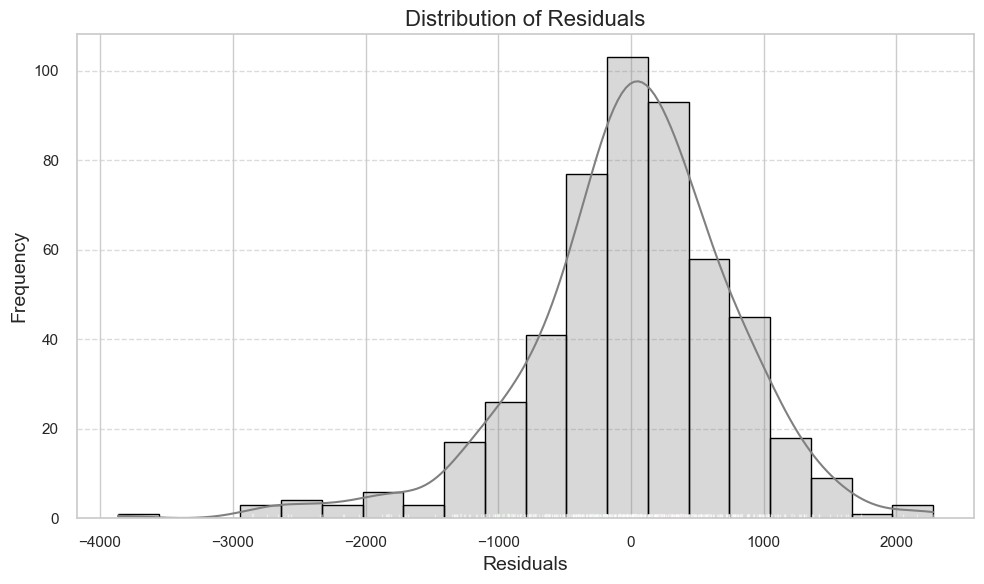

In [44]:
# Calculate residuals
residuals = Y_train - Y_train_pred

# Create a color array based on the residuals
colors = ['lightgreen' if r < 0 else 'lightcoral' for r in residuals]

# Plot the histogram of residuals with multi-color bars
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='grey', edgecolor='black', alpha=0.3)  # Base color
plt.bar(residuals, height=[1]*len(residuals), color=colors, alpha=0.5)  # Overlay bars with multi-color

# Add titles and labels
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Homoscedasticity

Homoscedasticity refers to the assumption that the variance of the residuals, or error terms, remains constant across all levels of the independent variables in a regression model. This property is essential for the validity of statistical inferences made from the model.

When homoscedasticity holds, the residuals display a consistent spread regardless of the predicted values, indicating that the model is equally reliable across the range of data. Conversely, the presence of heteroscedasticity—where residuals exhibit non-constant variance—can lead to inefficient estimates and affect the standard errors of the coefficients, ultimately compromising the reliability of hypothesis tests and confidence intervals.

To assess homoscedasticity, graphical methods such as residual plots can be employed, along with statistical tests like the Breusch-Pagan test or White test. Addressing any identified violations is crucial for ensuring the robustness of the regression analysis.

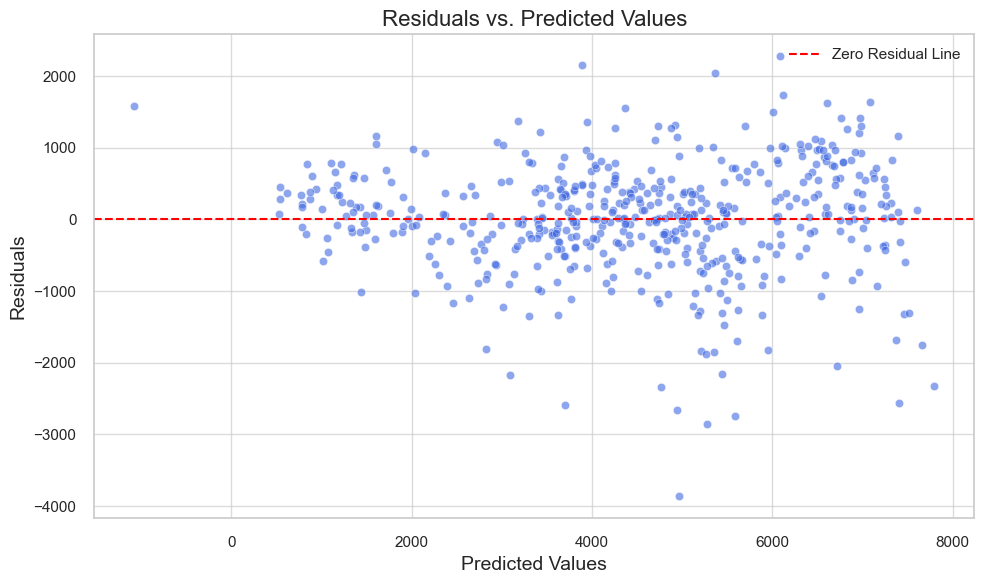

In [45]:
# Visualize Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_train_pred, y=residuals, color='royalblue', alpha=0.6)

# Add labels and title
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Values', fontsize=16)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual Line')

# Show grid and legend
plt.grid(alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

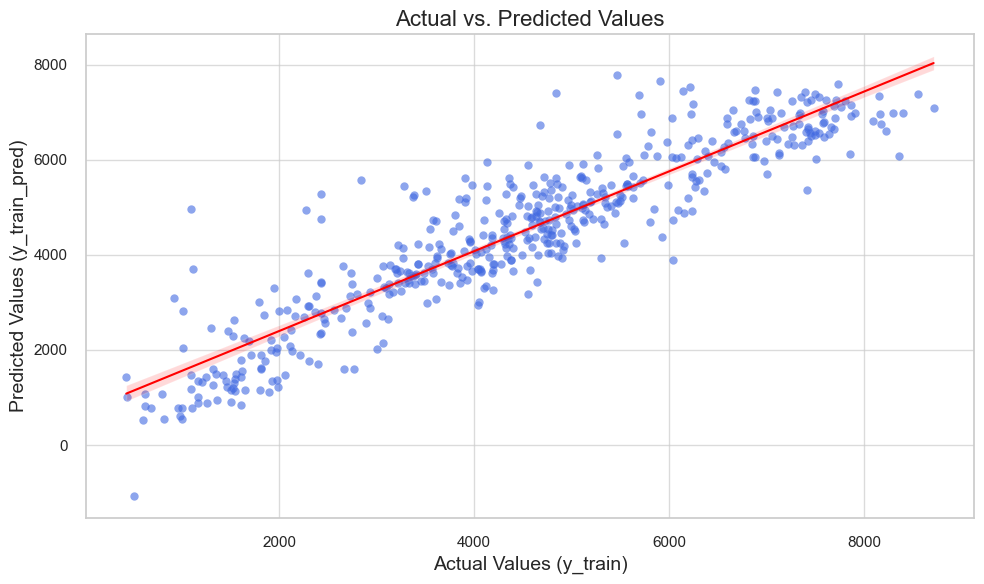

In [46]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_train, y=Y_train_pred, scatter_kws={'color': 'royalblue', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 1.5})

# Add title and labels
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_train)', fontsize=14)
plt.ylabel('Predicted Values (y_train_pred)', fontsize=14)

# Show grid and adjust layout
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

# Display the RMSE with a formatted message
print(f"Root Mean Squared Error (RMSE) for the Training Set: {rmse_train:.2f}")


Root Mean Squared Error (RMSE) for the Training Set: 771.22


The assumptions of the linear model have been validated, demonstrating that it is well-fitted and prepared for evaluation on the test set.

### Predicting Using the Final Model on the Test Set

#### Retaining Selected Features from the Final Model

The following code retains only the selected features from the final model for the test set:

In [48]:
# Retain only the selected features from the final model
X_test_scaled = X_test_scaled[X_train_rfe_3.columns]
X_test_scaled.head()

yr  workingday      temp       hum  windspeed    spring    winter  \
82  -0.986394    0.669023 -1.140532  1.297876   0.728728 -0.590157 -0.563037   
272 -0.986394    0.669023  0.359939  0.161627   0.243929 -0.590157  1.776083   
0   -0.986394   -1.494716 -0.822521  1.297876  -0.354130  1.694465 -0.563037   
648  1.013794    0.669023 -0.334310 -1.160015  -0.079326 -0.590157  1.776083   
437  1.013794    0.669023  0.404727 -0.846051  -0.943809  1.694465 -0.563037   

         July  November  September  Saturday  \
82  -0.310752 -0.303118  -0.291420 -0.408248   
272 -0.310752 -0.303118   3.431472 -0.408248   
0   -0.310752 -0.303118  -0.291420  2.449490   
648 -0.310752 -0.303118  -0.291420 -0.408248   
437 -0.310752 -0.303118  -0.291420 -0.408248   

     Light Snow - Rain & Thunderstorm  Mist & Cloudy  
82                          -0.155074       1.356056  
272                         -0.155074      -0.737432  
0                           -0.155074       1.356056  
648                         -0.155074      -0.737432  
437                         -0.155074      -0.737432

#### Adding a Constant to the Test Set

The following code adds a constant term to the test set and obtains the predicted values using the linear model:


In [49]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

# Get the predicted values from the linear model
Y_test_pred = model.predict(X_test_sm)

### Calculating R² Scores and Adjusted R² Scores for the Test Set


#### Calculating R² Score for the Test Set

The following code calculates the R² score for the test set and rounds the result to two decimal places:


In [50]:
# Calculate R² Score for the test set
r2_score_test = r2_score(y_true=Y_test, y_pred=Y_test_pred)
r2_score_test = round(r2_score_test, 2)

# Display the R² score
r2_score_test

0.83

In [51]:
# Calculating Adjusted R² Score for the Test Set
adj_r2_score_test = round(adjusted_r2_score(Y_test, Y_test_pred, n_features = len(X_test_scaled.columns)), 2)
adj_r2_score_test

0.82

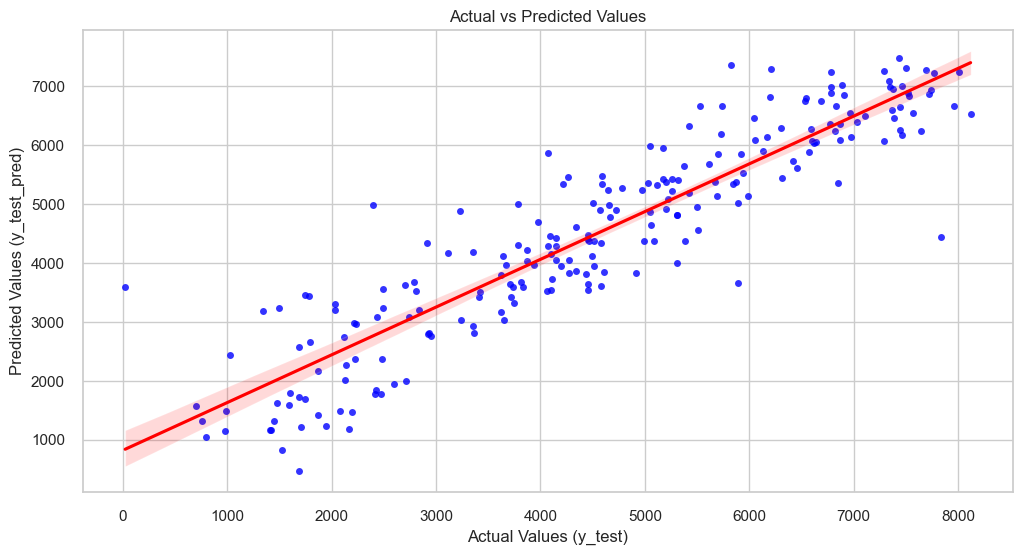

In [52]:
# Visualize predicted model with scatter plot and regression line
sns.regplot(x=Y_test, y=Y_test_pred, line_kws={'color': 'red'}, scatter_kws={'s': 25, 'color': 'blue'})

# Configure plot aesthetics
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.show()

In [53]:
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Display RMSE
print(f'RMSE for Test Set: {rmse_test:.2f}')

RMSE for Test Set: 799.53


In [54]:
# Display coefficients of the final model
coefficients = round(model.params, 2)
coefficients

const                               4484.45
yr                                   982.72
workingday                           190.25
temp                                 877.36
hum                                 -204.61
windspeed                           -183.56
spring                              -526.60
winter                               271.72
July                                -162.92
November                            -151.28
September                            137.03
Saturday                             163.73
Light Snow - Rain & Thunderstorm    -293.20
Mist & Cloudy                       -204.03
dtype: float64

### Equation of the Best-Fit Line

In a multivariate linear regression model, the equation of the best-fit line is represented as:

\[
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
\]

Where:
- \(Y\): Dependent variable (the variable being predicted), which is **cnt** in this case.
- \(\beta_0\): Y-intercept.
- \(\beta_1, \beta_2, \ldots, \beta_n\): Coefficients for the independent variables \(X_1, X_2, \ldots, X_n\).

The coefficients are calculated to minimize the sum of squared differences between predicted and actual values, providing the best linear fit for the data.

For our model, the equation representing the best-fit line is given by:

cnt = 4484.45 + 982.72 yr + 190.25  workingday + 877.36  temp - 204.61  hum - 183.56 \cdot windspeed - 526.60  spring + 271.72  winter - 162.92  July - 151.28  November + 137.03  September + 163.73  Saturday - 293.20  Light Snow - Rain \& Thunderstorm - 204.03  Mist \& Cloudy

This equation succinctly summarizes the relationships between the dependent variable (cnt) and the independent variables, highlighting the impact of each predictor on the outcome.


### Comparison of R² Scores and Adjusted R² Scores for Training and Test Sets

In evaluating the performance of our model, it is essential to compare the R² scores and Adjusted R² scores for both the training and test sets. These metrics provide insight into how well the model explains the variance in the data and how effectively it generalizes to unseen data.

| Metric               | Training Set | Test Set |
|----------------------|--------------|----------|
| R² Score             | {r2_score_train}      | {r2_score_test}  |
| Adjusted R² Score    | {adj_r2_score_train}  | {adj_r2_score_test}  |

The R² and Adjusted R² scores for the training and test sets are as follows:

In [55]:
# Calculate R2 Score for Training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)

# Print the R2 and Adjusted R2 scores for the training and test set
print(f'Training Set: \tR² - {r2_score_train:.3f}\n\t\tAdjusted R² - {adj_r2_score_train:.3f}\n')
print(f'Test Set: \tR² - {r2_score_test:.3f}\n\t\tAdjusted R² - {adj_r2_score_test:.3f}')

Training Set: 	R² - 0.840
		Adjusted R² - 0.840

Test Set: 	R² - 0.830
		Adjusted R² - 0.820


#### Evaluating Model Performance
The close alignment of R² and Adjusted R² values between the training and test sets (R²: 0.840 vs. 0.820 and Adjusted R²: 0.840 vs. 0.820) indicates effective generalization in the linear regression model. This similarity demonstrates that the model effectively avoids overfitting to the training data, suggesting a strong potential for consistent performance on new, unseen data.




### Conclusion

<div class="alert alert-block alert-warning">
    <b>Model Equation:</b>
    <p>cnt = 4484.45 + 982.72 yr + 190.25 workingday + 877.36 temp - 204.61 hum - 183.56 windspeed - 526.60 spring + 271.72 winter - 162.92 July - 151.28 November + 137.03 September + 163.73 Saturday - 293.20 Light Snow - Rain & Thunderstorm - 204.03 Mist & Cloudy</p>
    <br>
    <b>Model Evaluation:</b>
    <p>The close alignment of R² and Adjusted R² values between the training and test sets (R²: 0.840 vs. 0.820 and Adjusted R²: 0.840 vs. 0.820) indicates effective generalization in the linear regression model. This similarity demonstrates that the model effectively avoids overfitting to the training data, suggesting a strong potential for consistent performance on new, unseen data.</p>
    <br>
    <b>Influential Features:</b>
    <p>Bike demand is influenced by various features, including year (yr), working day (workingday), temperature (temp), humidity (hum), wind speed (windspeed), and seasonal indicators such as Summer, Winter, September, and Sunday.</p>
    <br>
    <b>Key Coefficients:</b>
    <p>Among the independent variables, temperature (temp), year (yr), and Winter show the highest coefficient values, highlighting their significant impact on bike demand.</p>
    <br>
    <b>Model Fit:</b>
    <p>The RMSE values of 771.22 for the training set and 799.53 for the test set indicate that the model fits the training data well while generalizing reasonably to new data, as evidenced by the minimal difference between training and test set performance.</p>
</div>

### Recommendation

<div class="alert alert-block alert-danger">
    <b>1. Leverage High-Impact Features:</b>
    <p>Focus on key features (temp, yr, Winter) with high coefficient values to enhance bike demand insights.</p>
    <br>
    <b>2. Continuous Monitoring and Adaptation:</b>
    <p>Regularly update the model with new data and adapt strategies to align with evolving market conditions for sustained revenue growth.</p>
    <br>
    <b>3. Optimize Operational Planning:</b>
    <p>Adjust bike availability and distribution based on significant features to optimize resources during peak demand periods.</p>
    <br>
    <b>4. Seasonal Strategies:</b>
    <p>Develop targeted marketing and pricing strategies for different seasons, with special emphasis on Summer and Winter promotions.</p>
    <br>
    <b>5. Weather-Sensitive Promotions:</b>
    <p>Implement weather-specific promotions to encourage bike usage during favorable conditions, considering the impact of temp, humidity, and windspeed.</p>
    <br>
    <b>6. User Engagement on Weekends:</b>
    <p>Capitalize on higher demand on Sundays by introducing special promotions or events to boost weekend bike usage.</p>
    <br>
    <b>7. New Market Insights:</b>
    <p>Utilize the developed model to gain insights into American market demand dynamics, informing competitive business strategies for BoomBikes.</p>
</div>
